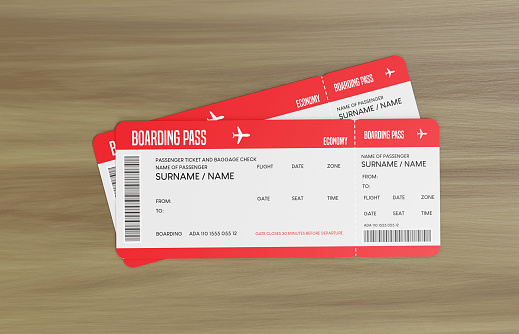

# Flight Price Prediction
#### Problem Statement: 

Flight ticket prices can be something hard to guess, today we might see a price, check out the price of the same flight tomorrow, it will be a different story. We might have often heard travellers saying that flight ticket prices are so unpredictable. Here you will be provided with prices of flight tickets for various airlines between the months of March and June of 2019 and between various cities.

Size of training set: 10683 records
Size of test set: 2671 records

FEATURES:
- Airline: The name of the airline.
- Date_of_Journey: The date of the journey
- Source: The source from which the service begins.
- Destination: The destination where the service ends.
- Route: The route taken by the flight to reach the destination.
- Dep_Time: The time when the journey starts from the source.
- Arrival_Time: Time of arrival at the destination.
- Duration: Total duration of the flight.
- Total_Stops: Total stops between the source and destination.
- Additional_Info: Additional information about the flight
- Price: The price of the ticket
 
You have to use your skills as a data scientist and build a machine learning model to predict the price of the flight ticket. 
 
Note: You can find the dataset in the link below. 

Download Files:
•	https://github.com/dsrscientist/Data-Science-ML-Capstone-Projects


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder

from sklearn.linear_model import LinearRegression,Lasso,ElasticNet,Ridge
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

from sklearn.linear_model import SGDRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import ExtraTreesRegressor

import warnings
warnings.filterwarnings('ignore')

In [111]:
#Loading the dataset
train=pd.read_excel("FlightP_Train.xlsx")
test=pd.read_excel("FlightP_test.xlsx")

In [112]:
train.sample(5)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
2409,Vistara,12/05/2019,Banglore,Delhi,BLR → DEL,17:00,19:35,2h 35m,non-stop,No info,4878
9928,Jet Airways,9/05/2019,Delhi,Cochin,DEL → BOM → COK,14:00,12:35 10 May,22h 35m,1 stop,In-flight meal not included,12373
2928,Air India,24/06/2019,Delhi,Cochin,DEL → BOM → COK,19:00,07:40 25 Jun,12h 40m,1 stop,No info,8372
9136,GoAir,12/05/2019,Banglore,Delhi,BLR → DEL,20:55,23:40,2h 45m,non-stop,No info,3419
6768,Jet Airways,24/06/2019,Delhi,Cochin,DEL → BOM → COK,19:45,12:35 25 Jun,16h 50m,1 stop,In-flight meal not included,10262


In [113]:
test.sample(5)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
1816,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,10:00,19:00,9h,1 stop,In-flight meal not included
498,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,16:55,19:45,2h 50m,non-stop,No info
27,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,17:30,19:00 22 May,25h 30m,1 stop,No info
703,Jet Airways,9/05/2019,Kolkata,Banglore,CCU → BOM → BLR,16:30,08:15 10 May,15h 45m,1 stop,In-flight meal not included
162,IndiGo,21/05/2019,Banglore,Delhi,BLR → DEL,16:55,19:55,3h,non-stop,No info


### Checking Info of the dataset

In [114]:
type(train), type(test)

(pandas.core.frame.DataFrame, pandas.core.frame.DataFrame)

In [115]:
train.shape,test.shape

((10683, 11), (2671, 10))

 Train dataset has 10683 rows and 11 columns, while Test Dataset has 2671 rows and 10 columns.

In [116]:
train.columns,test.columns

(Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
        'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
        'Additional_Info', 'Price'],
       dtype='object'),
 Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
        'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
        'Additional_Info'],
       dtype='object'))

The above mentioned columned are explained below:

    - Airline: The name of the airline.
    - Date_of_Journey: The date of the journey
    - Source: The source from which the service begins.
    - Destination: The destination where the service ends.
    - Route: The route taken by the flight to reach the destination.
    - Dep_Time: The time when the journey starts from the source.
    - Arrival_Time: Time of arrival at the destination.
    - Duration: Total duration of the flight.
    - Total_Stops: Total stops between the source and destination.
    - Additional_Info: Additional information about the flight
    - Price: The price of the ticket

In [117]:
train.info(),print("____________________________________"),test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB
____________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline       

(None, None, None)

All are object dataype columns in both Train and Test Dataset

In [118]:
#Knowing null values:

print(train.isnull().sum())
print("_____________________________________________"),
test.isnull().sum().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64
_____________________________________________


0

Train Dataset:

    - We can replace the Null values OR we can drop those since just 2 null values are present in the TRAIN dataset.
    - I will drop these null values as only 2 values are there.
Test Dataset:

    - It has no null values present.

In [119]:
#dropping null values:
train.dropna(inplace = True)

In [120]:
#rechecking the null values incase:
train.isnull().sum().sum()

0

#### No null values in both datasets

### Checking the elements/unique values in each columns of Train and Test data

In [121]:
print(train.nunique())
print("--------------------------------------------------------------------------")
test.nunique()

Airline              12
Date_of_Journey      44
Source                5
Destination           6
Route               128
Dep_Time            222
Arrival_Time       1343
Duration            368
Total_Stops           5
Additional_Info      10
Price              1870
dtype: int64
--------------------------------------------------------------------------


Airline             11
Date_of_Journey     44
Source               5
Destination          6
Route              100
Dep_Time           199
Arrival_Time       704
Duration           320
Total_Stops          5
Additional_Info      6
dtype: int64

#### Viewing Unique Values in Each Column of Train and Test Data:

In [122]:
for i in train:
    print(i)
    print(train[i].value_counts())
    print("-"*35)

Airline
Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64
-----------------------------------
Date_of_Journey
18/05/2019    504
6/06/2019     503
21/05/2019    497
9/06/2019     495
12/06/2019    493
9/05/2019     484
21/03/2019    423
15/05/2019    405
27/05/2019    382
27/06/2019    355
24/06/2019    351
1/06/2019     342
3/06/2019     333
15/06/2019    328
24/03/2019    323
6/03/2019     308
27/03/2019    299
24/05/2019    286
6/05/2019     281
1/05/2019     277
12/05/2019    259
1/04/2019     257
3/03/2019   

- In train dataset 9 airline carriers are present, the journeys are taken in the year 2019 from the month 3-6.There are 5 source cites, and 6 destination cities. There are 128 routes operated between these source and destination cities. Departure/Arrival time and Duration of flights are mentioned along with additional info about meals, baggage, Airport layover, airport change, class of travel etc. There is 1 nonstop and 4 kinds of stopovers.
- Price is mentioned, which is the target column.

In [123]:
for i in test:
    print(i)
    print(test[i].value_counts())
    print("-"*35)

Airline
Jet Airways                          897
IndiGo                               511
Air India                            440
Multiple carriers                    347
SpiceJet                             208
Vistara                              129
Air Asia                              86
GoAir                                 46
Multiple carriers Premium economy      3
Vistara Premium economy                2
Jet Airways Business                   2
Name: Airline, dtype: int64
-----------------------------------
Date_of_Journey
9/05/2019     144
12/06/2019    135
18/05/2019    129
6/06/2019     127
9/06/2019     119
21/05/2019    118
15/05/2019    106
15/06/2019    105
6/03/2019      97
21/03/2019     93
3/06/2019      92
1/06/2019      88
24/06/2019     85
1/04/2019      78
24/03/2019     78
27/06/2019     75
6/05/2019      73
24/05/2019     71
12/05/2019     68
27/05/2019     65
27/03/2019     65
1/05/2019      62
3/03/2019      62
9/03/2019      55
12/03/2019     43
18/03/2019 

- In test dataset 8 airline carriers are present, the journeys are taken in the year 2019 from the month 3-6.There are 5 source cites, and 6 destination cities. There are 100 routes operated between these source and destination cities. Departure/Arrival time and Duration of flights are mentioned along with additional info about meals, baggage, Airport layover, airport change, class of travel etc. There is 1 nonstop and 4 kinds of stopovers.

### Data Cleaning:

#### Few of the Values in "Airline", "Destination" and "Additional Info" column have same inofrmation under different subheadings. We need to address those.

IN TRAIN DATASET:

In [124]:
#Replacing "Jet Airways Business" as "Jet Airways" in the Airline Column:
train["Airline"] = train["Airline"].replace("Jet Airways Business","Jet Airways")

#Replacing "Multiple carriers Premium economy" as "Multiple carriers" in the Airline column:
train["Airline"] = train["Airline"].replace("Multiple carriers Premium economy","Multiple carriers")

#Replacing "Vistara Premium economy" as "Vistara" in the Airline column:
train["Airline"] = train["Airline"].replace("Vistara Premium economy","Vistara")

#Replacing "New Delhi" as "Delhi" in the Destination column:
train["Destination"] = train["Destination"].replace("New Delhi","Delhi")

#Replacing  "No Info" and "No info" with "No Info" in the  Additional Info column:
train["Additional_Info"] = train["Additional_Info"].replace("No info","No Info")

#Replacing "1 Long layover" and "2 Long layover" with "Long layover"in the Additional Info column:
train["Additional_Info"] = train["Additional_Info"].replace(["1 Long layover","2 Long layover"],"Long layover")

IN TEST DATASET:

In [125]:
#Replacing "Jet Airways Business" as "Jet Airways" in the Airline Column:
test["Airline"] = test["Airline"].replace("Jet Airways Business","Jet Airways")

#Replacing "Multiple carriers Premium economy" as "Multiple carriers" in the Airline column:
test["Airline"] = test["Airline"].replace("Multiple carriers Premium economy","Multiple carriers")

#Replacing "Vistara Premium economy" as "Vistara" in the Airline column:
test["Airline"] = test["Airline"].replace("Vistara Premium economy","Vistara")

#Replacing "New Delhi" as "Delhi" in the Destination column:
test["Destination"] = test["Destination"].replace("New Delhi","Delhi")

#Replacing  "No Info" and "No info" with "No Info" in the  Additional Info column:
test["Additional_Info"] = test["Additional_Info"].replace("No info","No Info")

#Replacing "1 Long layover" and "2 Long layover" with "Long layover"in the Additional Info column:
test["Additional_Info"] = test["Additional_Info"].replace(["1 Long layover","2 Long layover"],"Long layover")

#### Making the format of DATE to datetime for python in both datasets:

In [126]:
train["Journey_day"] = pd.to_datetime(train["Date_of_Journey"], format="%d/%m/%Y").dt.day
train["Journey_month"] = pd.to_datetime(train["Date_of_Journey"], format = "%d/%m/%Y").dt.month

test["Journey_day"] = pd.to_datetime(test.Date_of_Journey, format="%d/%m/%Y").dt.day
test["Journey_month"] = pd.to_datetime(test.Date_of_Journey, format = "%d/%m/%Y").dt.month

#All are in 2019, so we arent creating a year column seperately

In [127]:
# Since we have converted Date_of_Journey column into integers, Now we can drop as it is of no significance.

train.drop(["Date_of_Journey"], axis = 1, inplace = True)
test.drop(["Date_of_Journey"], axis = 1, inplace = True)

#### Similar way, we extract values from Dep_Time and Arrival_Time and create separate columns as departure/arrival hours and minutes as the Arrival time is having Month in it too along with the time.

In [128]:
#FOR TRAIN DATASET:
#Extracting Hours
train["Dep_hour"] = pd.to_datetime(train["Dep_Time"]).dt.hour
#Extracting Minutes
train["Dep_min"] = pd.to_datetime(train["Dep_Time"]).dt.minute
#Dropping Dep_Time as it will create duplicity
train.drop(["Dep_Time"], axis = 1, inplace = True)

#FOR TEST DATASET:
#Extracting Hours
test["Dep_hour"] = pd.to_datetime(test["Dep_Time"]).dt.hour
#Extracting Minutes
test["Dep_min"] = pd.to_datetime(test["Dep_Time"]).dt.minute
#Dropping Dep_Time as it will create duplicity
test.drop(["Dep_Time"], axis = 1, inplace = True)

In [129]:
#FOR TRAIN DATASET:
#Extracting Hours
train["Arrival_hour"] = pd.to_datetime(train["Arrival_Time"]).dt.hour
#Extracting Minutes
train["Arrival_min"] = pd.to_datetime(train["Arrival_Time"]).dt.minute
#Dropping Dep_Time as it will create duplicity
train.drop(["Arrival_Time"], axis = 1, inplace = True)

#FOR TEST DATASET:
#Extracting Hours
test["Arrivalhour"] = pd.to_datetime(test["Arrival_Time"]).dt.hour
#Extracting Minutes
test["Arrival_min"] = pd.to_datetime(test["Arrival_Time"]).dt.minute
#Dropping Dep_Time as it will create duplicity
test.drop(["Arrival_Time"], axis = 1, inplace = True)

#### We need Duration column in same format also for ML.Hence we seperate it in duration hrs and duration minutes.

In [130]:
#FOR TRAIN DATASET:
D=list(train["Duration"])

for i in range(len(D)):
    if len(D[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in D[i]:
            D[i] = D[i].strip() + " 0m"   # Adds 0 minute
        else:
            D[i] = "0h " + D[i]           # Adds 0 hour

#creating empty lists:
duration_hours = []
duration_mins = []
for i in range(len(D)):
    duration_hours.append(int(D[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(D[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration

In [131]:
# Adding duration_hours and duration_mins list to train dataset

train["Duration_hours"] = duration_hours
train["Duration_mins"] = duration_mins

train.drop(["Duration"], axis = 1, inplace = True) #Drop the column for no duplicate data.

In [132]:
#FOR TEST DATASET:
D=list(test["Duration"])

for i in range(len(D)):
    if len(D[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in D[i]:
            D[i] = D[i].strip() + " 0m"   # Adds 0 minute
        else:
            D[i] = "0h " + D[i]           # Adds 0 hour

#creating empty lists:
duration_hours = []
duration_mins = []
for i in range(len(D)):
    duration_hours.append(int(D[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(D[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration

In [133]:
# Adding duration_hours and duration_mins list to test dataset

test["Duration_hours"] = duration_hours
test["Duration_mins"] = duration_mins

test.drop(["Duration"], axis = 1, inplace = True) #Drop the column for no duplicate data.

In [134]:
#checking the changes in the Train dataset
train.head(2)

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,Delhi,BLR → DEL,non-stop,No Info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No Info,7662,1,5,5,50,13,15,7,25


In [135]:
#checking the changes in the TEST dataset
test.head(2)

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Journey_day,Journey_month,Dep_hour,Dep_min,Arrivalhour,Arrival_min,Duration_hours,Duration_mins
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1 stop,No Info,6,6,17,30,4,25,10,55
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,1 stop,No Info,12,5,6,20,10,20,4,0


#### Dropping duplicates in both datasets

In [136]:
print("Rows and Columns before dropping duplicates: ", train.shape)
train.drop_duplicates(inplace=True)
print("Rows and Columns after dropping duplicates: ", train.shape)

Rows and Columns before dropping duplicates:  (10682, 15)
Rows and Columns after dropping duplicates:  (10460, 15)


In [137]:
print("Rows and Columns before dropping duplicates: ", test.shape)
test.drop_duplicates(inplace=True)
print("Rows and Columns after dropping duplicates: ", test.shape)

Rows and Columns before dropping duplicates:  (2671, 14)
Rows and Columns after dropping duplicates:  (2644, 14)


# Visualization of the training data

In [29]:
train.columns

Index(['Airline', 'Source', 'Destination', 'Route', 'Total_Stops',
       'Additional_Info', 'Price', 'Journey_day', 'Journey_month', 'Dep_hour',
       'Dep_min', 'Arrival_hour', 'Arrival_min', 'Duration_hours',
       'Duration_mins'],
      dtype='object')

#### UNIVARIATE ANALYSIS :

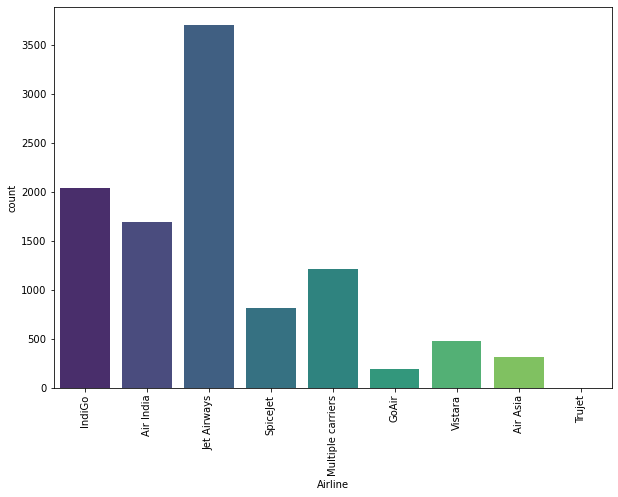

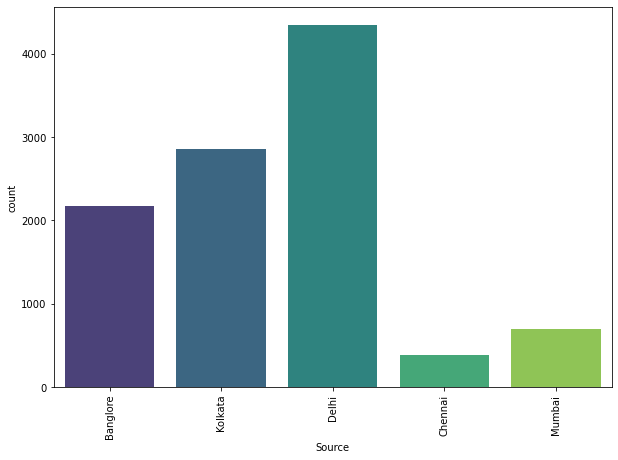

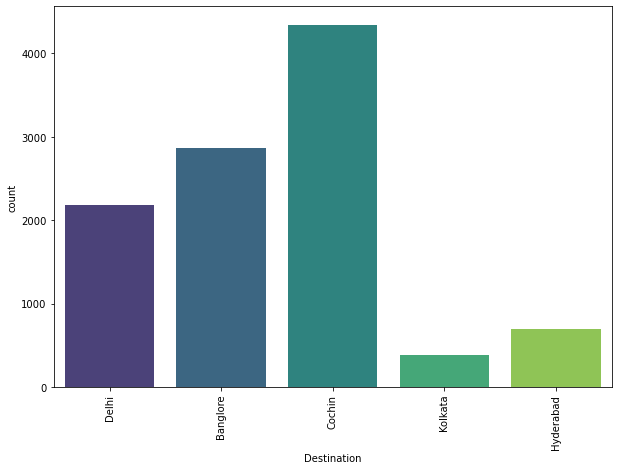

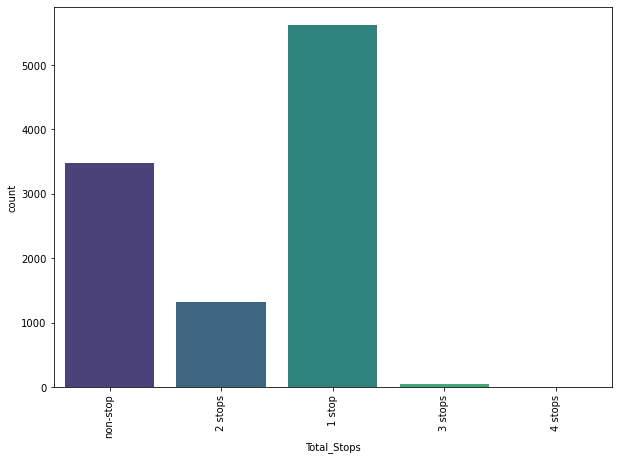

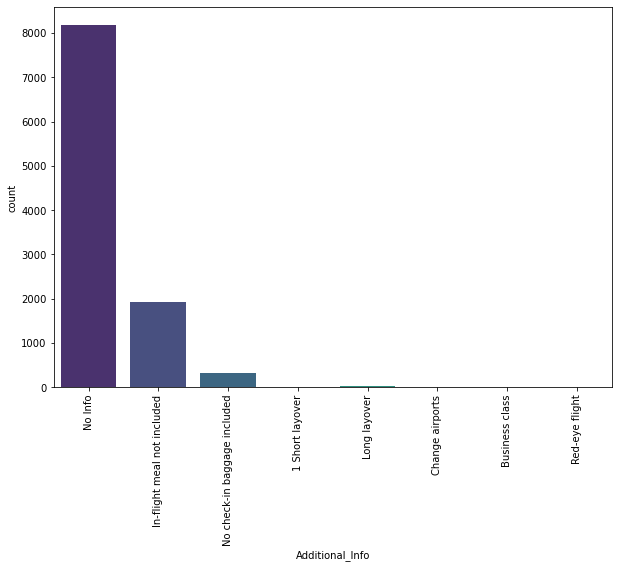

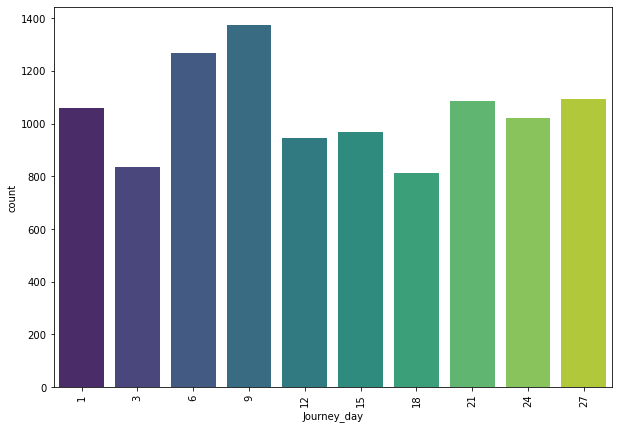

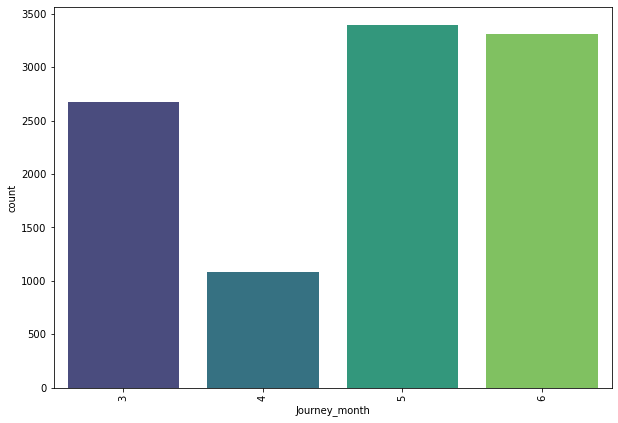

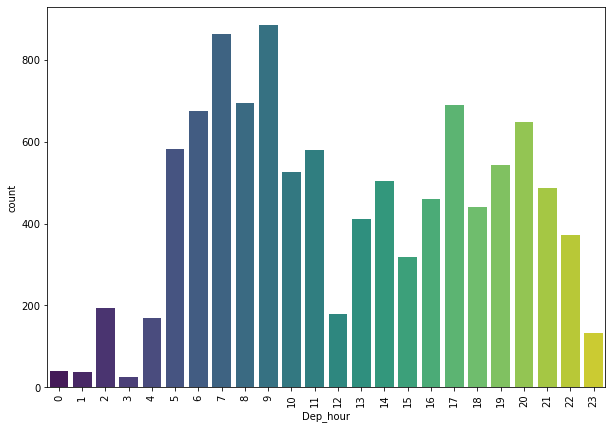

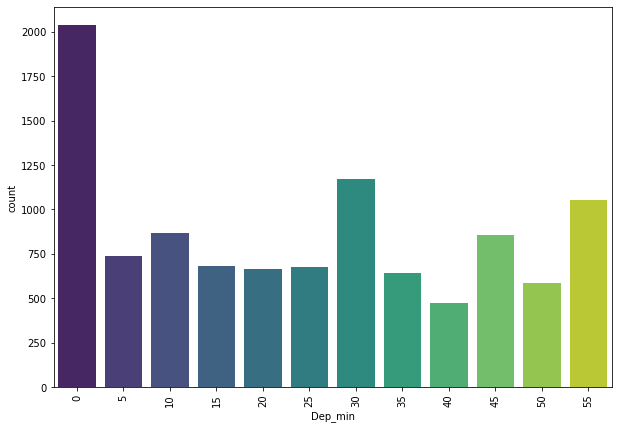

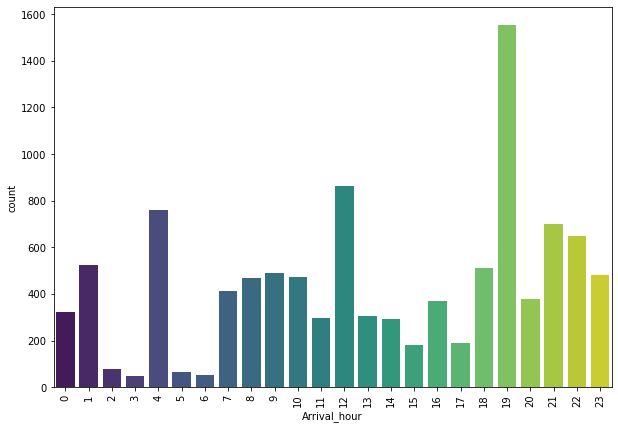

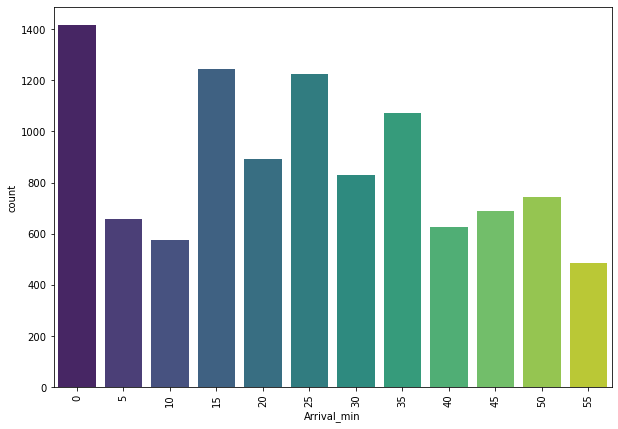

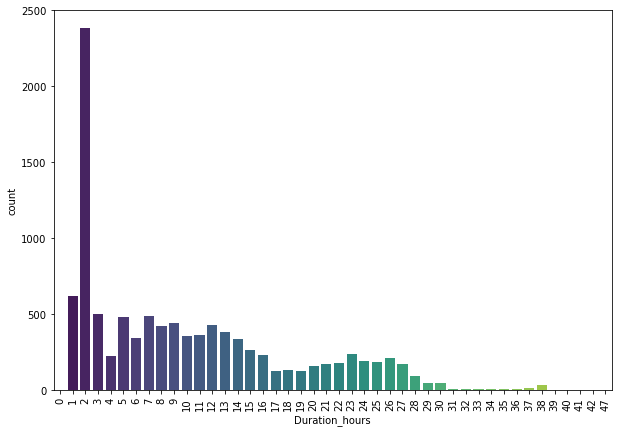

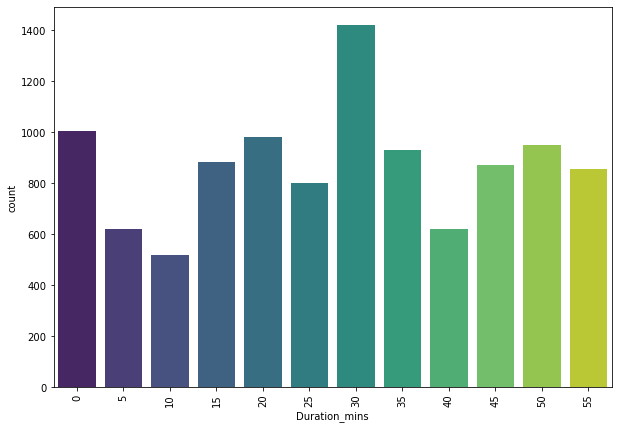

In [30]:
train_columns=['Airline', 'Source', 'Destination', 'Total_Stops', 'Additional_Info', 'Journey_day', 'Journey_month', 
               'Dep_hour','Dep_min', 'Arrival_hour', 'Arrival_min', 'Duration_hours', 'Duration_mins']
for i in train_columns:
    plt.figure(figsize=(10,7))
    plt.xticks(rotation=90)
    sns.countplot(train[i],palette='viridis')
    plt.show()

Airline:
  - 9 airlines/carriers have been mentioned in the dataset. - Indigo, Air India, JetAirways, SpiceJet,GoAir,Vistara, AirAsia,Trujet, Multiple carriers
  - JetAirways had the highest number of flights (count=3750 approx) operating, followed by Indigo (2000 counts) in the span of 3 months.
  - Least number of flights which flew in these 3 months were of Trujet.    

Source:
  - The source cities are Bangalore,Kolkata,Delhi, Chennai, Mumbai.
  - The origin of most flights was Delhi airport (count=4500), followed by Kolkata (around 3000). Least flights flew from Chennai (count=Approx 500)

Destination:
 - The destination cities are Delhi, Bangalore, Cochin, Kolkata, Hyderabad.
 - The Destination was Kochi where most flights landed at the end of the day (count=4500), followed by Bangalore( almost 3000).
 - The least flights which landed were reported in Kolkata.
 
Total Stops:
 - Most flights(almost 6000) made 1 stop on their  route, while (almost 3500) flew nonstop. About 1500 made 2 stops while very few made 3 stops on their route. Handful or least flights took a 4 stop stop-over.
      
Additional Info:
 - Maximum flight records showed no info. Meal was not included informationw as available on about 2000 flights. LEast was the inofrmation on long layover, while change airport, business class, red eye flight, 1 short layover informations were available in a negligible way.

Journey Day:
 - Max people(almost 1400) took journey on 9th of the month and least (almost 800) took on 18th.
     
Journey Month:
 - Approximately a bit less than 3500 people took journey in the month of MAY 2019 by flight. This was the maximum number.
 - Least people took flights in April ( count= Approx 1200)
 
- Most flights departed at 9AM while least flights departed at 3AM.
- Maximum flights arrived at 7PM, while least arrived at 3AM at their repective destinations.
- Maximum flights were of 2 hrs durations. Least flights flew between 40-47 hrs to reach their destination.

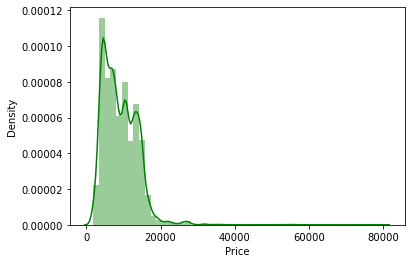

In [31]:
sns.distplot(train['Price'],color='green')
plt.show()

- The price of flights ranged between 2.5K to 80K.
- Maximum frequncy of the price was between 5k-10K.
- The graph shows right skewness (positive skewness)

TEST DATA:

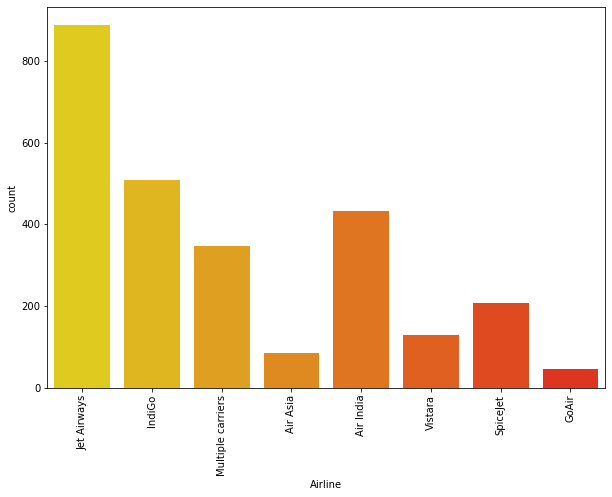

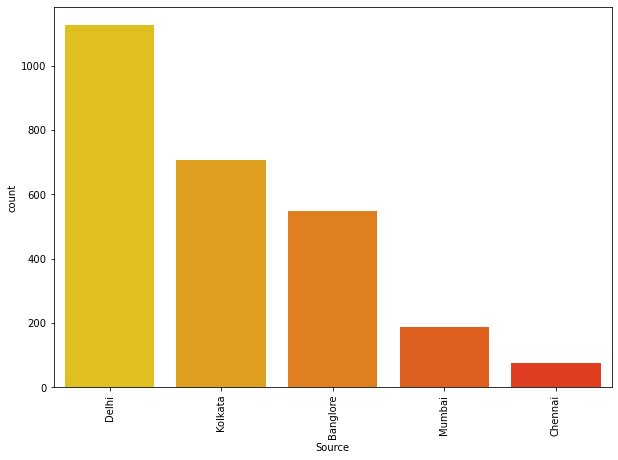

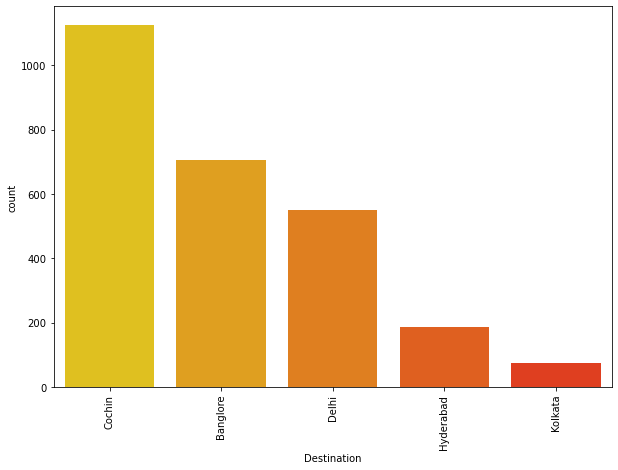

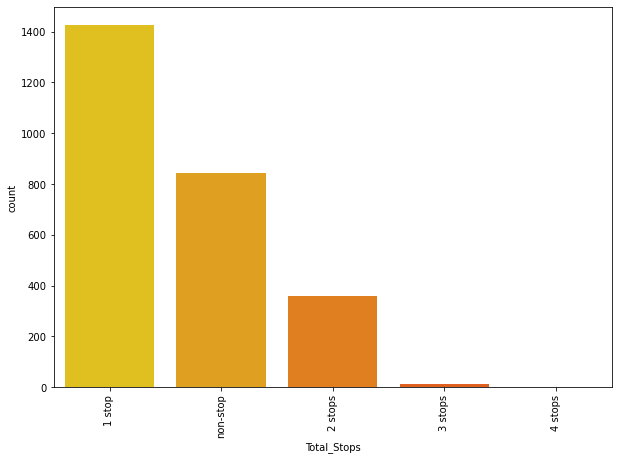

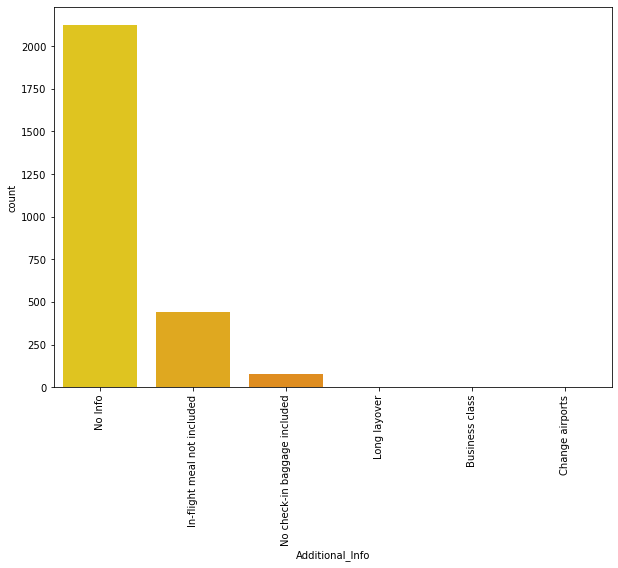

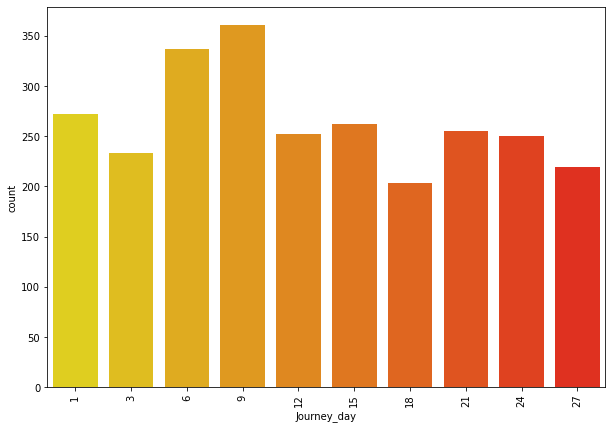

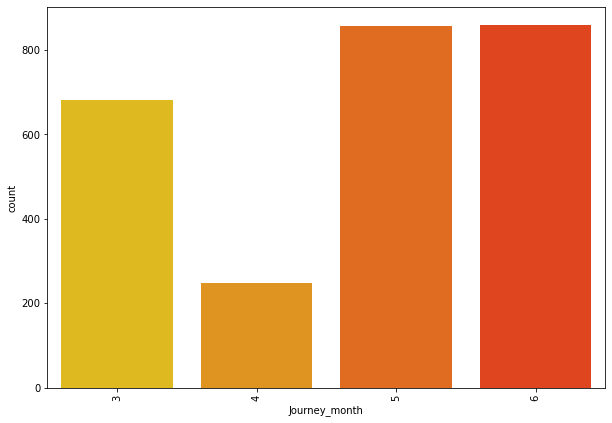

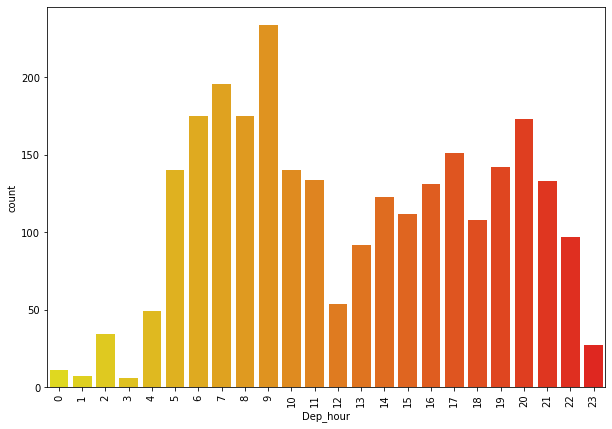

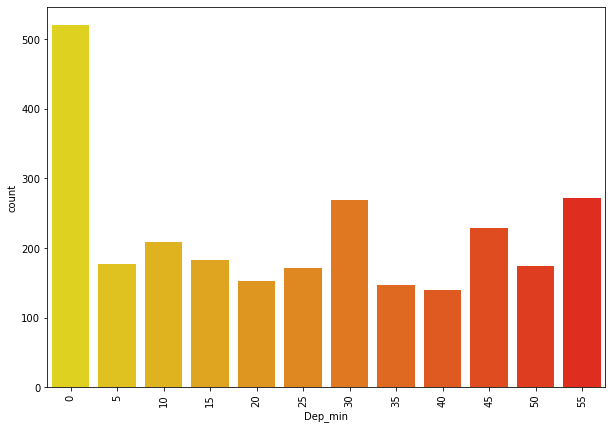

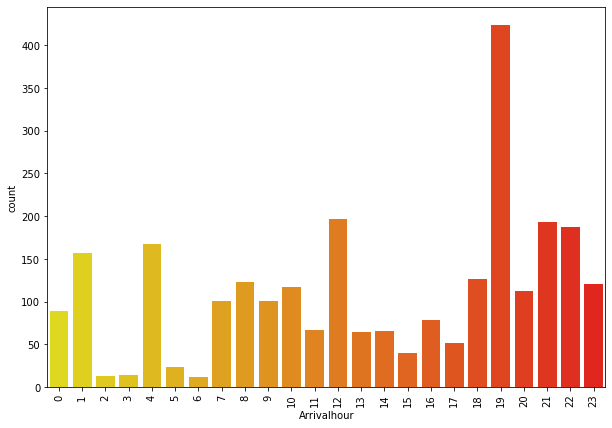

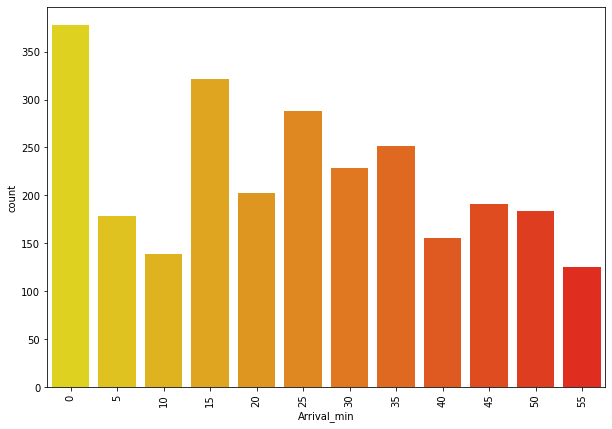

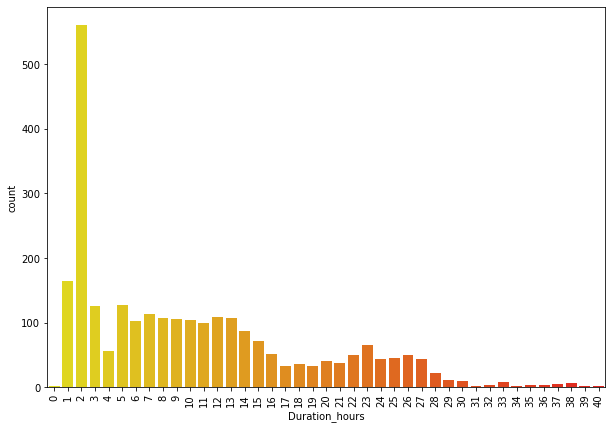

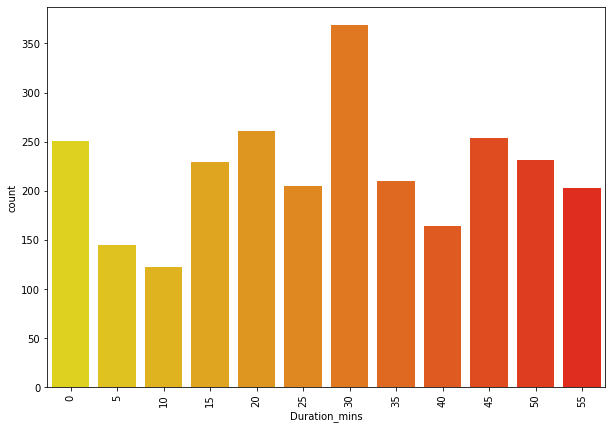

In [32]:
test_columns=['Airline', 'Source', 'Destination', 'Total_Stops', 'Additional_Info', 'Journey_day', 'Journey_month', 
               'Dep_hour','Dep_min', 'Arrivalhour', 'Arrival_min', 'Duration_hours', 'Duration_mins']
for i in test_columns:
    plt.figure(figsize=(10,7))
    plt.xticks(rotation=90)
    sns.countplot(test[i],palette='autumn_r')
    plt.show()

Airline:

- 8  airlines have been mentioned in the dataset. - Indigo, Air India, JetAirways, SpiceJet,GoAir, Vistara, AirAsia,Multiple carriers.
- JetAirways had the highest number of flights (count=900 approx) operating, followed by Indigo (550 counts) in the span of 3 months.
- Least number of flights which flew in these 3 months were of GoAir.

Source:

- The source cities are Bangalore,Kolkata,Delhi, Chennai, Mumbai.
- The origin of most flights was Delhi airport (count=1200), followed by Kolkata (around 700). Least flights flew from Chennai (count=Approx 100)

Destination:

- The destination cities are Delhi, Bangalore, Cochin, Kolkata, Hyderabad.
- The Destination was cochin where most flights landed at the end of the day (count=1200), followed by Bangalore( almost 700).
- The least flights which landed were reported in Kolkata.
Total Stops:

- Most flights(almost 1400) made 1 stop on their route, while (almost 820) flew nonstop. About 380 made 2 stops while very few made 3 stops on their route. Handful or least flights took a 4 stop stop-over.

Additional Info:

- Maximum flight records showed no info. Meal was not included informationw as available on about 480 flights. Least was the information on long layover, while change airport, business class informations were available in a negligible way.

Journey Day:

- Max people(almost 350+) took journey on 9th of the month and least (almost 200) took on 18th.

Journey Month:

- Approximately a bit less than 900 people took journey in the month of MAY 2019 by flight. This was the maximum number.
- Least people took flights in April ( count= Approx 230)
- Most flights departed at 9AM while least flights departed at 3AM.
- Maximum flights arrived at 7PM, while least arrived at 2AM at their repective destinations.
- Maximum flights were of 2 hrs durations. Least flights flew for 31 or 40 hrs to reach their destination.

### BIVARIATE ANALYSIS:

FOR TRAIN DATASET:

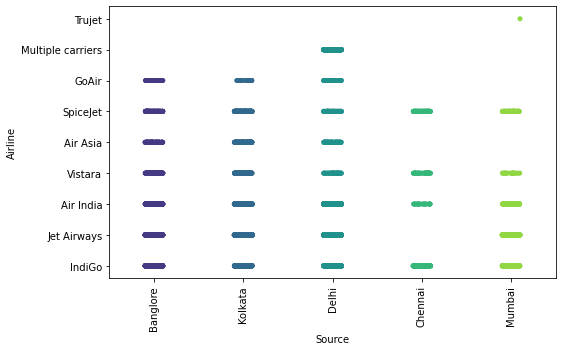

In [33]:
plt.figure(figsize=(8,5))
sns.stripplot(x="Source",y="Airline",data=train,palette='viridis')
plt.xticks(rotation=90)
plt.show()

- Delhi had maximum number of flight flying towards their destination, while Vistara, Air India, Indigo,and Spicejet operated from all the 5 citites.
- Jey airways,Air Asia and Go Air flew only from Bangalore, Kolkata and Delhi.

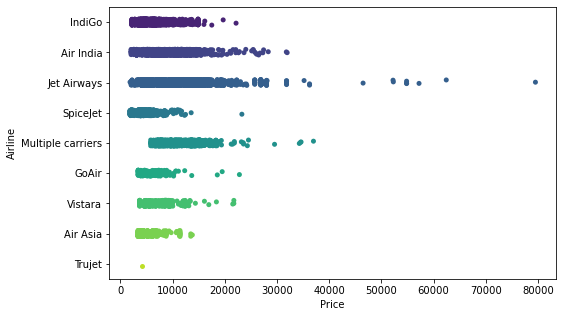

In [35]:
plt.figure(figsize=(8,5))
sns.stripplot(x="Price",y="Airline",data=train,palette='viridis')
plt.show()

- Price for Jetairways was highest of all the carriers ranging maximum mostly till 35000, while some fares rached around 80000 too.
- Least price were for TruJet which was 5000 maximum.

<Figure size 576x360 with 0 Axes>

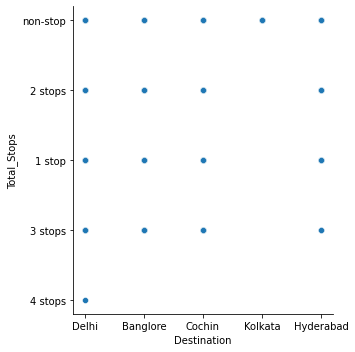

In [36]:
plt.figure(figsize=(8,5))
sns.relplot(x="Destination",y="Total_Stops",data=train,palette='viridis')
plt.show()

- Kolkata had flight which was nonstop only. Rest all places had flights with 1/2/3 stops. 
- Delhi was the only city where to reach 4 stops were taken.

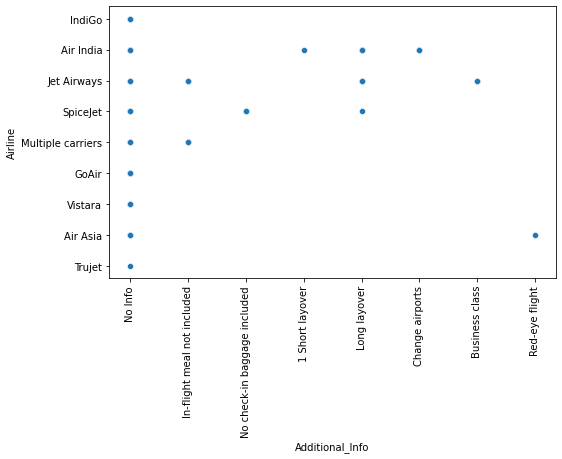

In [37]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='Additional_Info',y='Airline',data=train,palette='viridis')
plt.xticks(rotation=90)
plt.show()

- Inflight meal was not included in Multiple carriers and JetAirways.
- Checkin baggage was not included in SpiceJet.
- 1 Short Layover was included in Air India.
- Long Layovers were included in Air India, SpiceJet and Jetairways.
- Airport change was included for Air India.
- Business class was included in Jet Airways.
- AirAsia Operated the redeye flights.

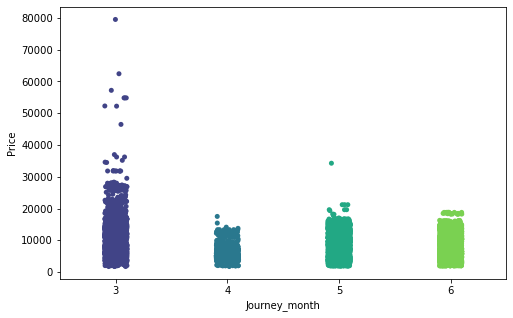

In [38]:
plt.figure(figsize=(8,5))
sns.stripplot(x='Journey_month',y='Price',data=train,palette='viridis')
plt.show()

- Most journeys were taken in the month of March where maximum price was 80000, and maximum often occuring price was 30000.
- April showed least journey undertaking by passengers, where the maximum fare was 20000 almost.

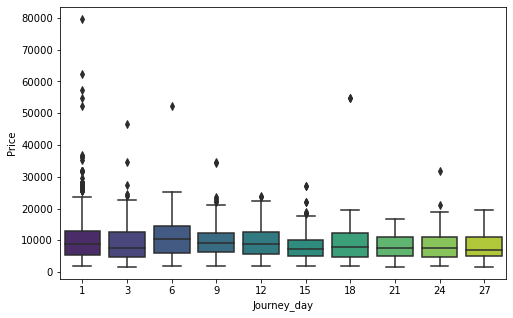

In [39]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Journey_day',y='Price',data=train,palette='viridis')
plt.show()

- 6th day of the month showed maximum travel, where the price was almost nearly 30000, with few exceptions which reached 55000.
- On first day the highest price reached 80000.
- on 21st day the lowest price was around 20000.

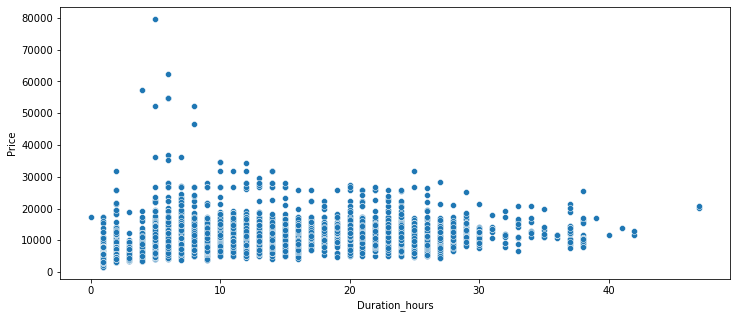

In [40]:
plt.figure(figsize=(12,5))
sns.scatterplot(x='Duration_hours',y='Price',data=train,palette='viridis')
plt.show()

- More the hours, lesser were the price of the ticket. 
- while maximum price ranged between 1-8 hrs of flight duration.

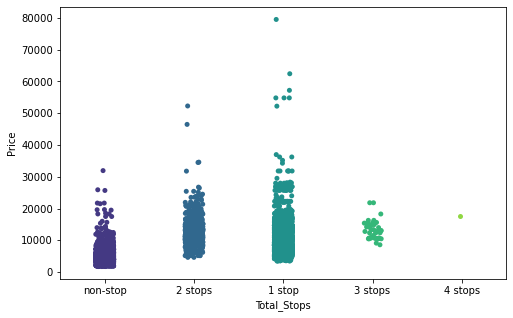

In [41]:
plt.figure(figsize=(8,5))
sns.stripplot(x='Total_Stops',y='Price',data=train,palette='viridis')
plt.show()

- More the stop, lesser was the price.
- With 1 stop, the maximum price was at 80000, but the maximum density in price was till 30000.

<Figure size 576x360 with 0 Axes>

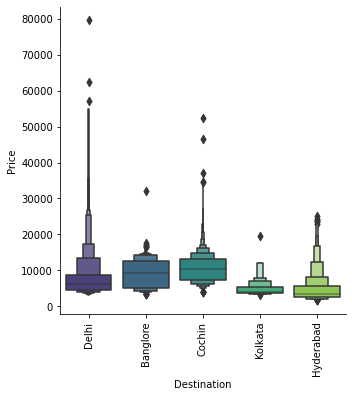

In [42]:
plt.figure(figsize=(8,5))
sns.catplot(x='Destination',y='Price',data=train,palette='viridis',kind='boxen')
plt.xticks(rotation=90)
plt.show()

Flights to Delhi as final destination had highest price of 80000, while flights to Kolkata had lowest price of about 25000.

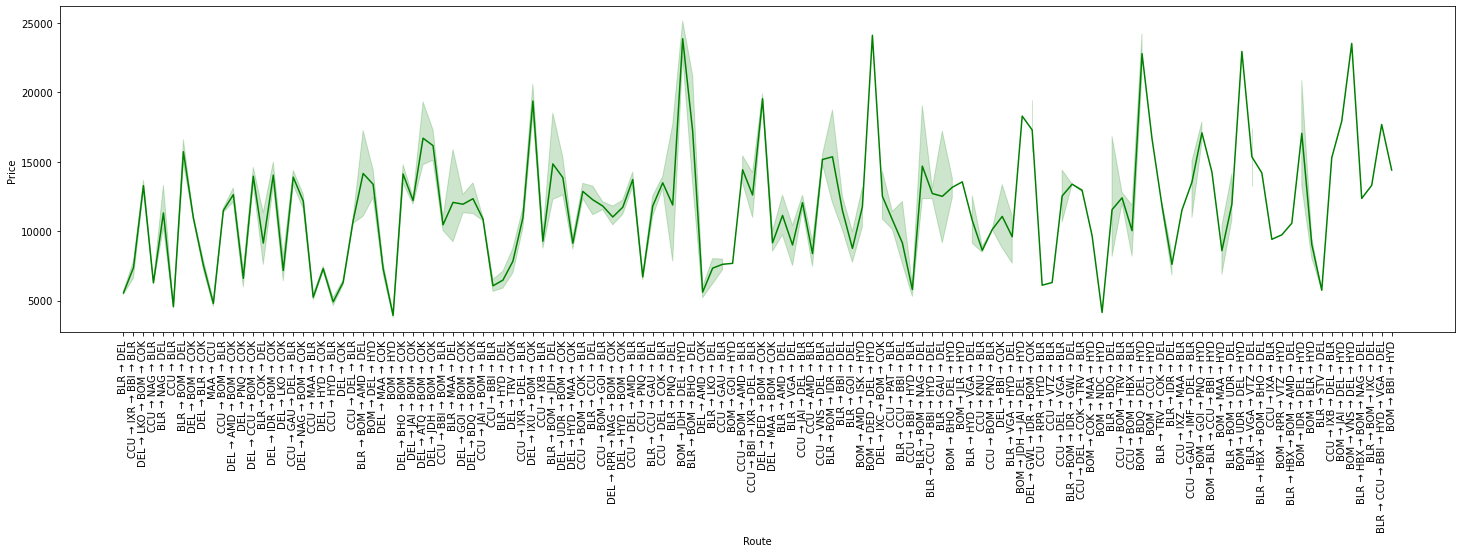

In [43]:
plt.figure(figsize=(25,6))
sns.lineplot(y='Price',x='Route',data=train,color='green')
plt.xticks(rotation=90)
plt.show()

- BOM-IDH-DEL-HYD, BLR-BOM-BHO-DEL, BOM-DED-DEL-HYD have highest rpice range of  about 25000.
- BOM-NDC-HYD,BOM-HYD had the lowest price of less than 5000

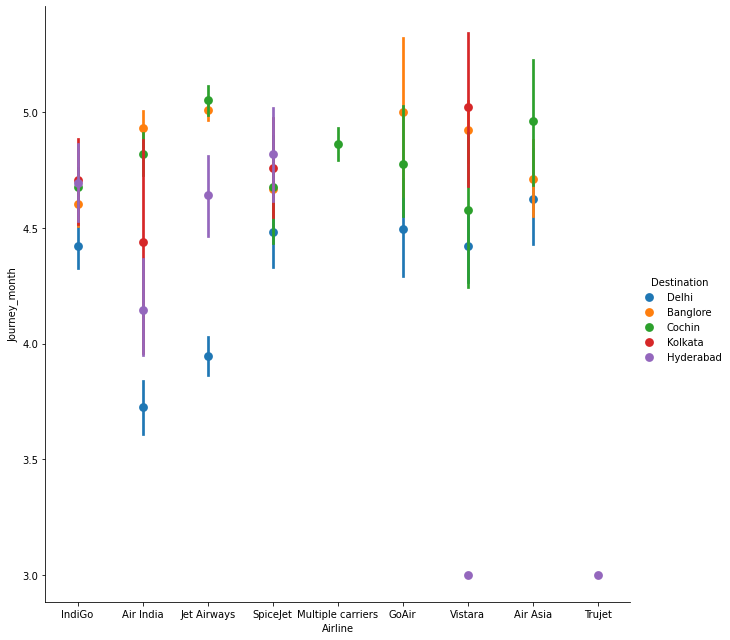

In [110]:
sns.factorplot('Airline','Journey_month',data=train, hue='Destination',size=9, join=False)

- Only in Month of March, Vistara and Trujet seem to reaching HYD.
- Most flights flew in April_May.
- Only 1 Multiple Carrier Airline flew in end of April to reach Cochin.

### MULTIVARIATE ANALYSIS:

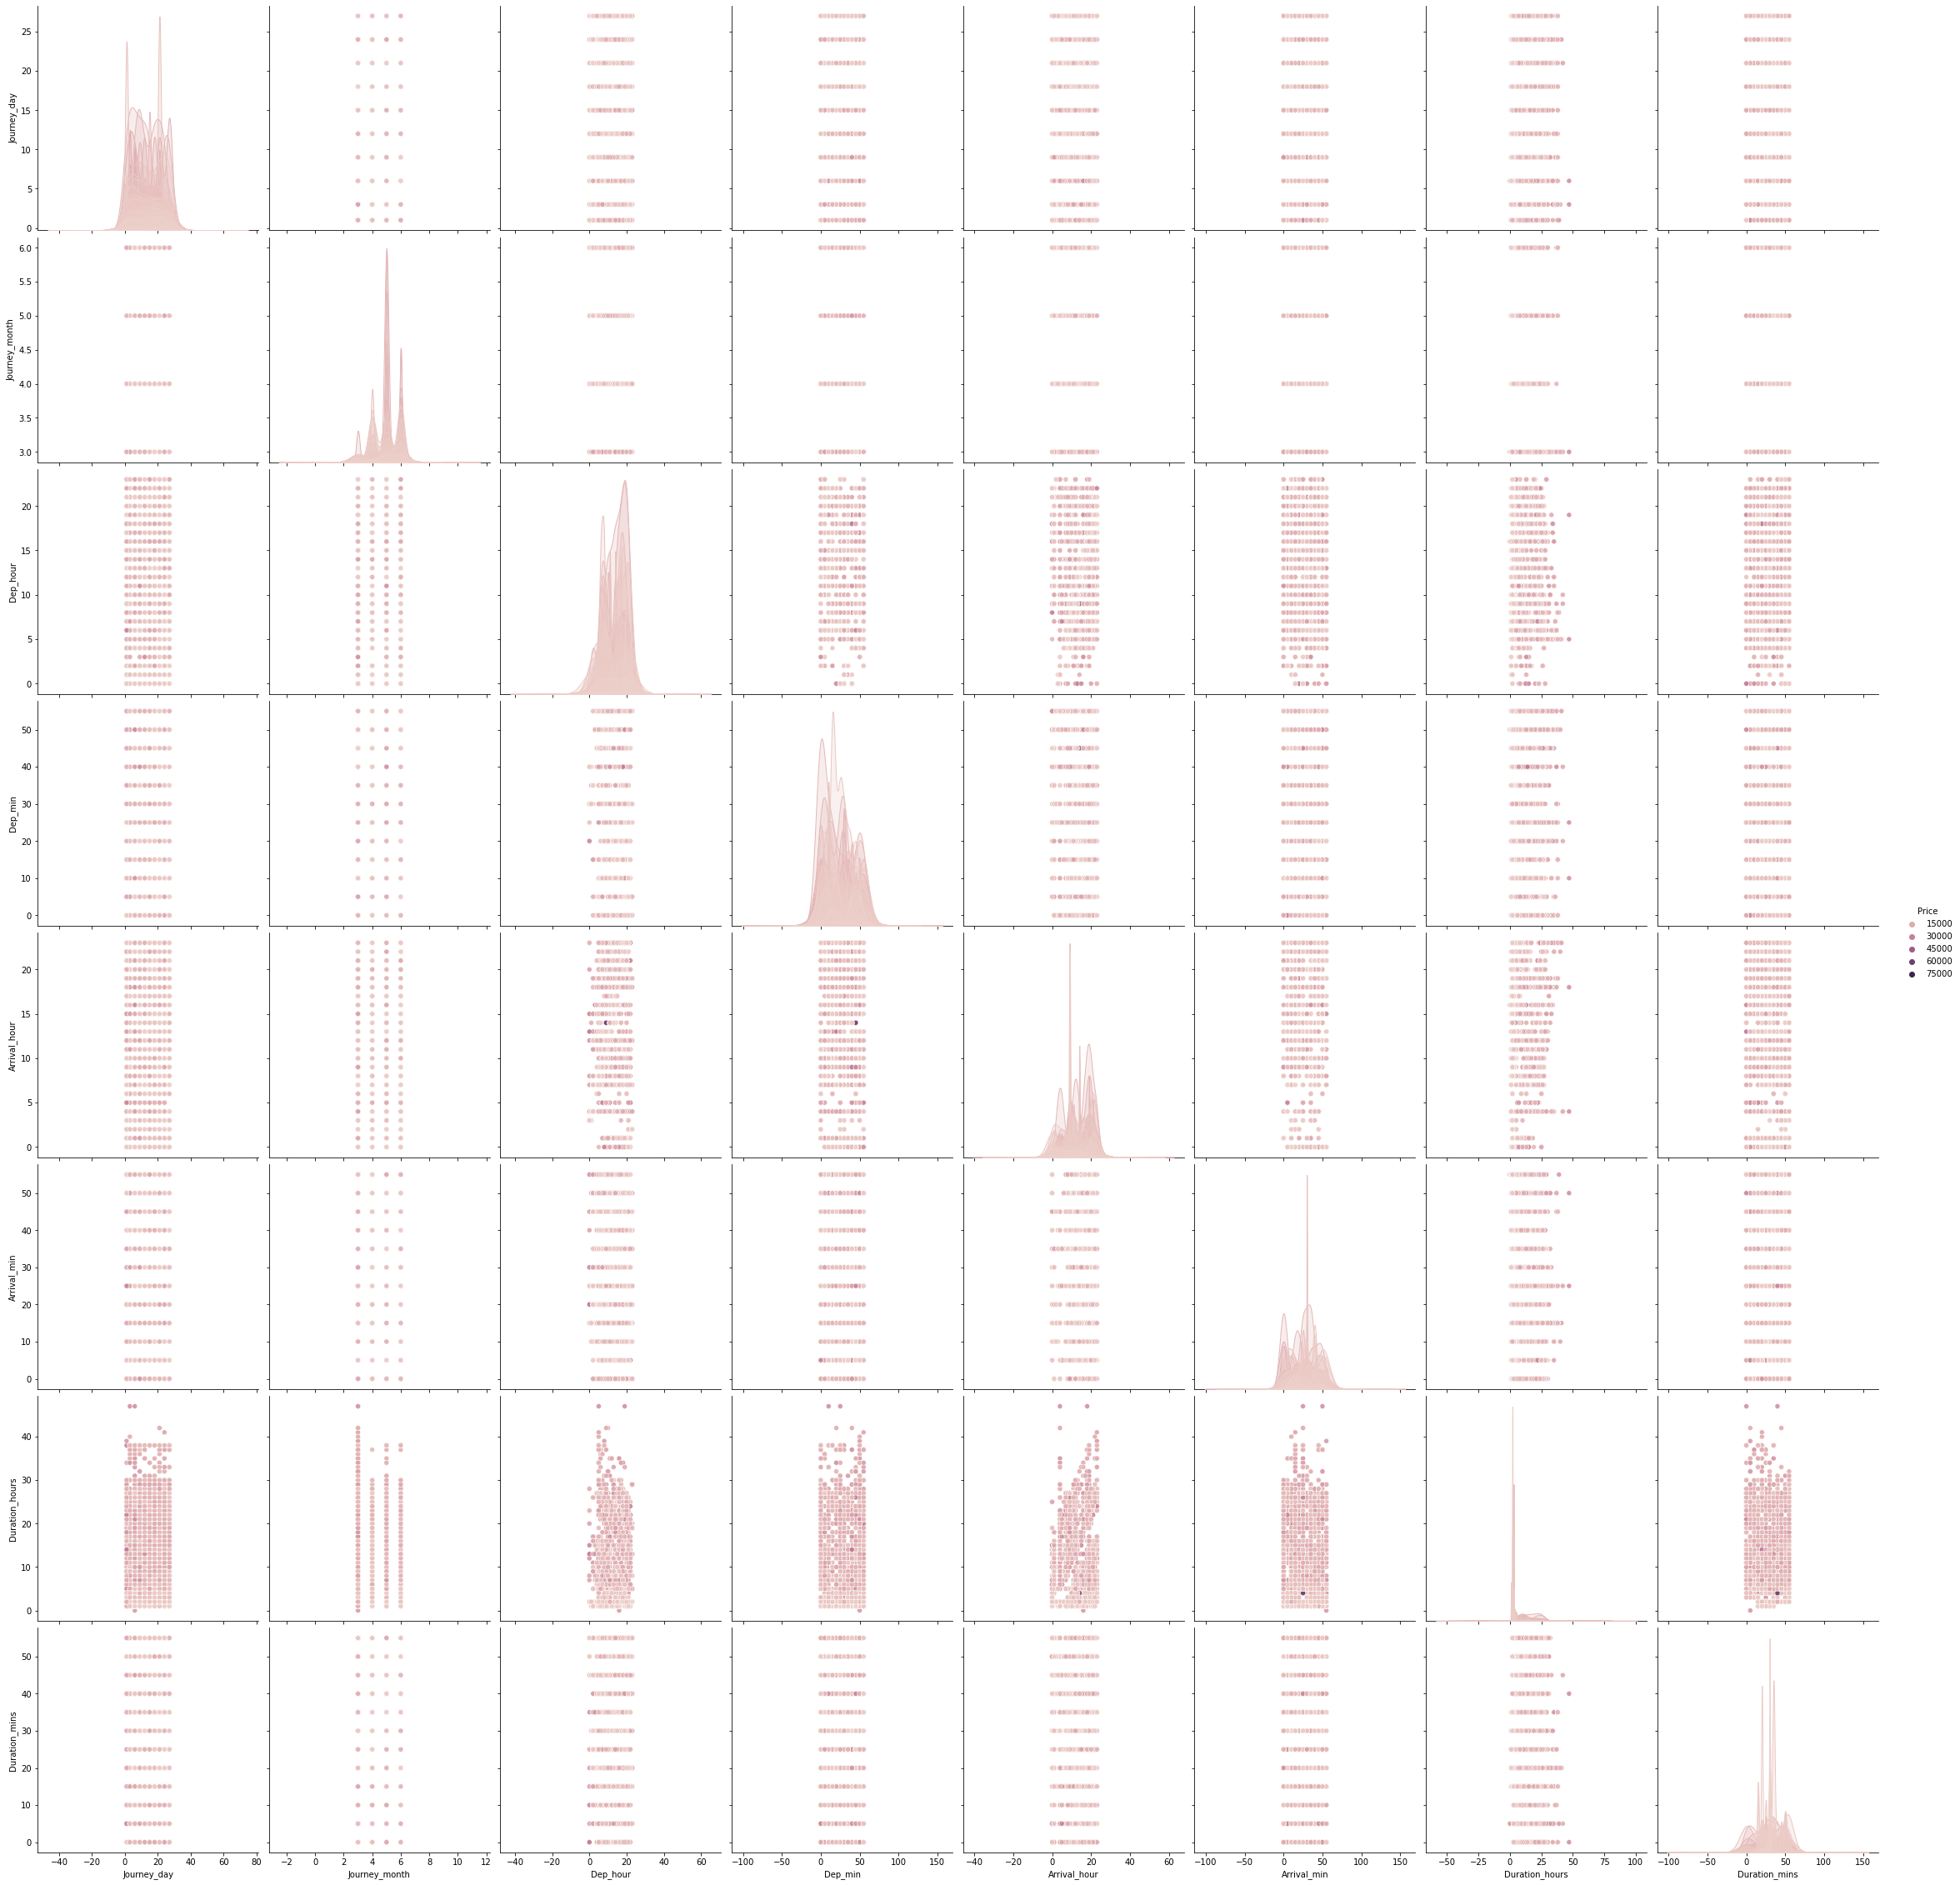

In [149]:
sns.pairplot(data=train,height=4,kind='scatter',hue='Price')
plt.show()

These graphs give relationship of columns with each other.

## Encoding the Datasets:

Encoding the columns to numerical form in both test and train datasets

In [139]:
le=LabelEncoder()
l=['Airline', 'Source', 'Destination', 'Route', 'Total_Stops', 'Additional_Info']
for val in l:
    train[val]=le.fit_transform(train[val].astype(str))

In [140]:
#ENCODING FOR TEST DATA:
le=LabelEncoder()
lt=['Airline','Source', 'Destination', 'Route', 'Total_Stops', 'Additional_Info']
for val in lt:
    test[val]=le.fit_transform(test[val].astype(str))

In [141]:
train

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,3,0,2,18,4,5,3897,24,3,22,20,1,10,2,50
1,1,3,0,84,1,5,7662,1,5,5,50,13,15,7,25
2,4,2,1,118,1,5,13882,9,6,9,25,4,25,19,0
3,3,3,0,91,0,5,6218,12,5,18,5,23,30,5,25
4,3,0,2,29,0,5,13302,1,3,16,50,21,35,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,3,0,64,4,5,4107,9,4,19,55,22,25,2,30
10679,1,3,0,64,4,5,4145,27,4,20,45,23,20,2,35
10680,4,0,2,18,4,5,7229,27,4,8,20,11,20,3,0
10681,8,0,2,18,4,5,12648,1,3,11,30,14,10,2,40


In [142]:
test

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Journey_day,Journey_month,Dep_hour,Dep_min,Arrivalhour,Arrival_min,Duration_hours,Duration_mins
0,4,2,1,76,0,4,6,6,17,30,4,25,10,55
1,3,3,0,65,0,4,12,5,6,20,10,20,4,0
2,4,2,1,76,0,2,21,5,19,15,19,0,23,45
3,5,2,1,76,0,4,21,5,8,0,21,0,13,0
4,0,0,2,16,4,4,24,6,23,55,2,45,2,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,1,3,0,51,0,4,6,6,20,30,20,25,23,55
2667,3,3,0,43,4,4,27,3,14,20,16,55,2,35
2668,4,2,1,76,0,4,6,3,21,50,4,25,6,35
2669,1,2,1,76,0,4,6,3,4,0,19,15,15,15


## EXPLATORY DATA ANALYSIS(EDA)

In [143]:
train.describe()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
count,10460.000000,10460.000000,10460.000000,10460.000000,10460.000000,10460.000000,10460.000000,10460.000000,10460.000000,10460.000000,10460.000000,10460.000000,10460.000000,10460.000000,10460.000000
mean,3.615392,1.954015,1.177247,74.297228,1.462620,4.656405,9027.360421,13.463193,4.701816,12.476673,24.406310,13.390057,24.723231,10.027725,28.206023
std,1.796719,1.186133,1.022053,36.702744,1.821208,0.815937,4625.057376,8.467058,1.163676,5.726244,18.816989,6.854048,16.570287,8.378088,16.877967
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1759.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,2.000000,0.000000,48.000000,0.000000,5.000000,5224.000000,6.000000,3.000000,8.000000,5.000000,8.000000,10.000000,2.000000,15.000000
50%,4.000000,2.000000,1.000000,73.000000,0.000000,5.000000,8266.000000,12.000000,5.000000,11.000000,25.000000,14.000000,25.000000,8.000000,30.000000
75%,4.000000,3.000000,2.000000,104.000000,4.000000,5.000000,12346.250000,21.000000,6.000000,18.000000,40.000000,19.000000,35.000000,15.000000,45.000000
max,8.000000,4.000000,4.000000,127.000000,4.000000,7.000000,79512.000000,27.000000,6.000000,23.000000,55.000000,23.000000,55.000000,47.000000,55.000000


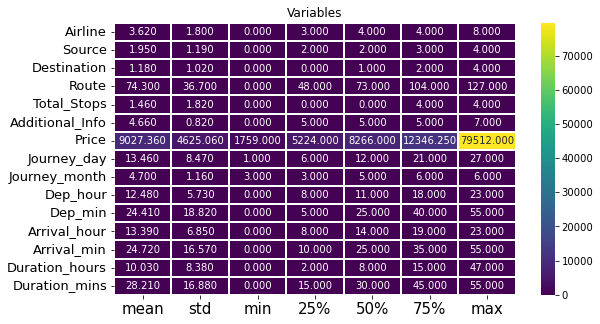

In [144]:
#plotting heat map for better understanding:
plt.figure(figsize=(9,5))
sns.heatmap(round(train.describe()[1:].transpose(),2),linewidth=2, annot=True,fmt='0.3f',cmap='viridis')
plt.xticks(fontsize=15)
plt.yticks(fontsize=13)
plt.title("Variables")
plt.show()

### Describing the dataset:

- The difference between 75% and max is huge in duration hours,Arrival Minutes, Arrival hour,Dep Minute, departure hour,Price. This indicates that there might be outliers in these columns.
- The mean > Median in Duration Hr, departure hour,Price which means data is right skewed.
- Std deviation is high in all numerical columns, meaning data in these columns is highly spread.

## Check the correlation of training dataset with the target column:

In [145]:
train.corr() #correlation 

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
Airline,1.000000,-0.012113,0.053423,0.020763,-0.011480,-0.055389,0.023490,0.023250,0.033813,-0.016963,-0.071417,-0.007203,-0.085901,-0.117711,-0.043123
Source,-0.012113,1.000000,-0.432494,0.403597,-0.222519,-0.033122,0.013597,0.005444,0.180696,0.060774,-0.056741,0.027703,0.021073,0.166807,-0.145130
Destination,0.053423,-0.432494,1.000000,-0.229317,0.509208,0.115801,-0.260681,0.003571,-0.149701,-0.089358,0.096923,-0.061339,0.007413,-0.382926,0.022343
Route,0.020763,0.403597,-0.229317,1.000000,-0.435836,0.010849,0.154228,0.079778,0.236346,-0.074738,-0.071104,0.021093,-0.174534,0.280050,-0.241539
Total_Stops,-0.011480,-0.222519,0.509208,-0.435836,1.000000,0.234954,-0.571954,0.030280,-0.021028,0.039885,0.049446,-0.098919,0.177072,-0.613495,0.184176
Additional_Info,-0.055389,-0.033122,0.115801,0.010849,0.234954,1.000000,-0.115628,-0.017871,-0.056056,-0.061326,0.012587,-0.011098,0.044978,-0.223579,0.063682
Price,0.023490,0.013597,-0.260681,0.154228,-0.571954,-0.115628,1.000000,-0.158995,-0.113605,0.005373,-0.024177,0.030821,-0.086295,0.504152,-0.131553
Journey_day,0.023250,0.005444,0.003571,0.079778,0.030280,-0.017871,-0.158995,1.000000,-0.038343,-0.003438,-0.004836,-0.002483,-0.015125,-0.029388,-0.009178
Journey_month,0.033813,0.180696,-0.149701,0.236346,-0.021028,-0.056056,-0.113605,-0.038343,1.000000,0.040890,-0.062753,0.000918,-0.099582,0.006144,-0.045981
Dep_hour,-0.016963,0.060774,-0.089358,-0.074738,0.039885,-0.061326,0.005373,-0.003438,0.040890,1.000000,-0.014969,-0.003259,0.073342,-0.000343,-0.019252


<AxesSubplot:>

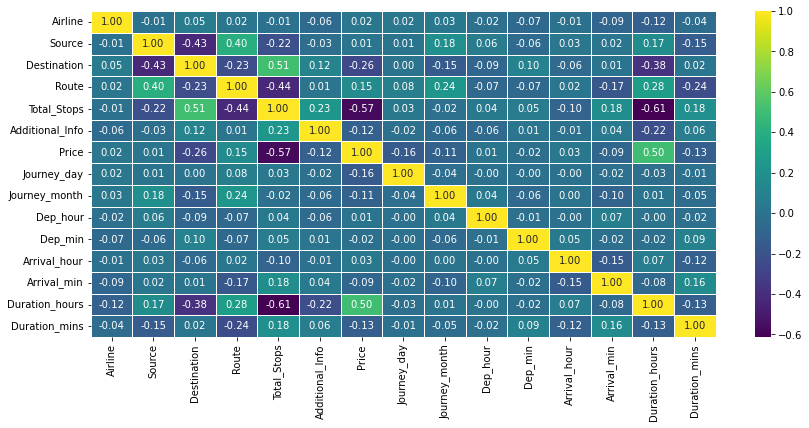

In [41]:
plt.figure(figsize=(14,6))
sns.heatmap(train.corr(),cmap='viridis',annot=True,linewidth=0.5,fmt='0.2f')

Our target column is "Price":
    - Highest positive correlation is seem with the following columns:
- Duration_hours    -- 0.50
- Route             -- 0.15

Almost neutral correlation:
- Arrival_hour      -- 0.03
- Airline           -- 0.02
- Source            -- 0.01
- Dep_hour          -- 0.00

While negative correlation is seem with the columns:
- Journey_day    --   -0.15
- Destination    --   -0.26
- Total_Stops    --   -0.57

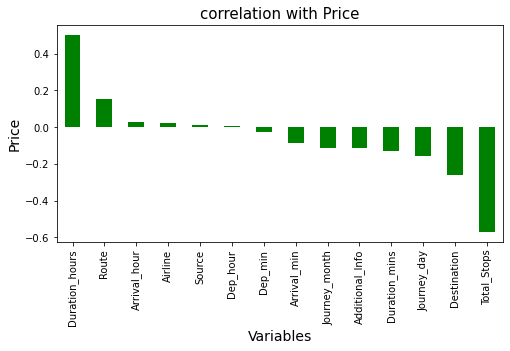

In [42]:
#checking the columns which are positively and negatively corelated with the target column:

plt.figure(figsize=(8,4))
train.corr()["Price"].sort_values(ascending=False).drop(["Price"]).plot(kind='bar', color='green')
plt.xlabel('Variables',fontsize=14)
plt.ylabel("Price",fontsize=14)
plt.title("correlation with Price",fontsize=15)
plt.show()


As seen above, graphiccaly it can be inferred that the negative correlation is seem with the columns:

- Journey_day -- -0.15
- Destination -- -0.26
- Total_Stops -- -0.57 (Most negative)

In [146]:
train.corr()["Price"].sort_values(ascending=False, inplace=False, kind='quicksort')

Price              1.000000
Duration_hours     0.504152
Route              0.154228
Arrival_hour       0.030821
Airline            0.023490
Source             0.013597
Dep_hour           0.005373
Dep_min           -0.024177
Arrival_min       -0.086295
Journey_month     -0.113605
Additional_Info   -0.115628
Duration_mins     -0.131553
Journey_day       -0.158995
Destination       -0.260681
Total_Stops       -0.571954
Name: Price, dtype: float64

## Using VIF to remove highly correlated column:

#### In Training Dataset:

In [147]:
x=train.drop("Price",axis=1)
y=train["Price"]

In [148]:
x.shape,y.shape, x.shape[1]

((10460, 14), (10460,), 14)

In [149]:
import statsmodels.api as sm
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor

def vif_calc():
    vif=pd.DataFrame()
    vif["VIF Factor"]=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    vif["features"]=x.columns
    print(vif)

In [150]:
vif_calc()

    VIF Factor         features
0     4.854860          Airline
1     5.315932           Source
2     3.699889      Destination
3     8.293974            Route
4     3.809326      Total_Stops
5    22.583090  Additional_Info
6     3.471850      Journey_day
7    15.762322    Journey_month
8     5.557000         Dep_hour
9     2.716981          Dep_min
10    4.740630     Arrival_hour
11    3.450552      Arrival_min
12    3.649186   Duration_hours
13    4.056672    Duration_mins


Both columns Additional info and Journey_month are not related, so we cant just remove them randomly. Rest all columns have values below 10, hence no cllinearity is seen in the dataset

# Checking Outliers in Training and Testing data:

TRAIN DATASET:

Airline               AxesSubplot(0.125,0.657941;0.133621x0.222059)
Source             AxesSubplot(0.285345,0.657941;0.133621x0.222059)
Destination         AxesSubplot(0.44569,0.657941;0.133621x0.222059)
Route              AxesSubplot(0.606034,0.657941;0.133621x0.222059)
Total_Stops        AxesSubplot(0.766379,0.657941;0.133621x0.222059)
Additional_Info       AxesSubplot(0.125,0.391471;0.133621x0.222059)
Price              AxesSubplot(0.285345,0.391471;0.133621x0.222059)
Journey_day         AxesSubplot(0.44569,0.391471;0.133621x0.222059)
Journey_month      AxesSubplot(0.606034,0.391471;0.133621x0.222059)
Dep_hour           AxesSubplot(0.766379,0.391471;0.133621x0.222059)
Dep_min                  AxesSubplot(0.125,0.125;0.133621x0.222059)
Arrival_hour          AxesSubplot(0.285345,0.125;0.133621x0.222059)
Arrival_min            AxesSubplot(0.44569,0.125;0.133621x0.222059)
Duration_hours        AxesSubplot(0.606034,0.125;0.133621x0.222059)
Duration_mins         AxesSubplot(0.766379,0.125

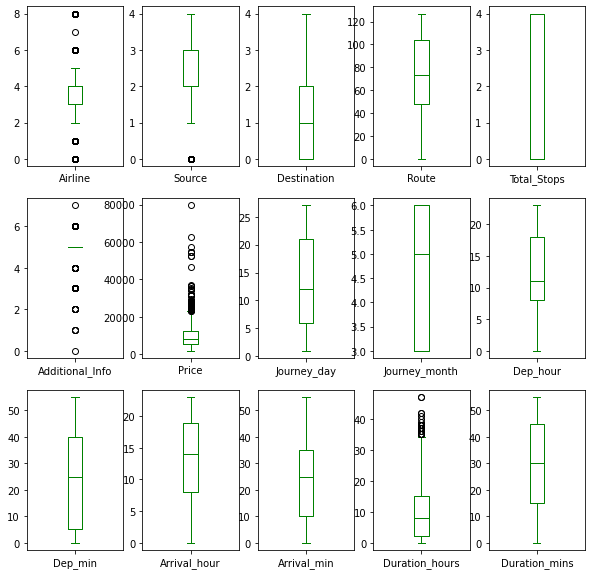

In [151]:
train.plot(kind='box',subplots=True,layout=(3,5),figsize=(10,10), color='green')

Outliers can be seen in the Duration hour column. Other columns are categorical so we will consider the numerical data only for training. We will remove the outliers with Z score method,where threshold can be considered as 3. Above this value everything will be considered as an Outlier.

In [152]:
from scipy.stats import zscore
z=np.abs(zscore(train[['Duration_hours']]))

threshold=3
(np.where(z>3))

Train=train[(z<3).all(axis=1)]

In [153]:
print('Old_DF:',train.shape)
print('New_DF:',Train.shape)
print('total dropped rows:',train.shape[0]-Train.shape[0])

Old_DF: (10460, 15)
New_DF: (10400, 15)
total dropped rows: 60


### Percentage data loss

In [154]:
loss_percent=(10460-10400)/10460*100
print(loss_percent,'%')

0.5736137667304015 %


We can see the percent data loss as merely 0.5%, so it is acceptable.

Checking Outliers in TEST DATASET:

Airline               AxesSubplot(0.125,0.657941;0.133621x0.222059)
Source             AxesSubplot(0.285345,0.657941;0.133621x0.222059)
Destination         AxesSubplot(0.44569,0.657941;0.133621x0.222059)
Route              AxesSubplot(0.606034,0.657941;0.133621x0.222059)
Total_Stops        AxesSubplot(0.766379,0.657941;0.133621x0.222059)
Additional_Info       AxesSubplot(0.125,0.391471;0.133621x0.222059)
Journey_day        AxesSubplot(0.285345,0.391471;0.133621x0.222059)
Journey_month       AxesSubplot(0.44569,0.391471;0.133621x0.222059)
Dep_hour           AxesSubplot(0.606034,0.391471;0.133621x0.222059)
Dep_min            AxesSubplot(0.766379,0.391471;0.133621x0.222059)
Arrivalhour              AxesSubplot(0.125,0.125;0.133621x0.222059)
Arrival_min           AxesSubplot(0.285345,0.125;0.133621x0.222059)
Duration_hours         AxesSubplot(0.44569,0.125;0.133621x0.222059)
Duration_mins         AxesSubplot(0.606034,0.125;0.133621x0.222059)
dtype: object

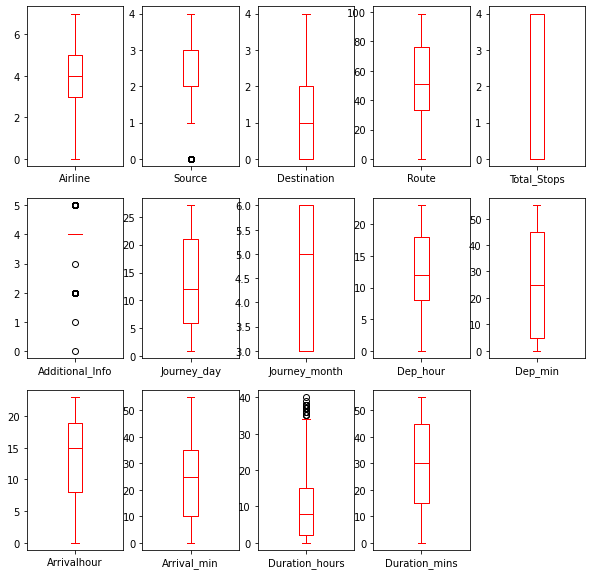

In [155]:
test.plot(kind='box',subplots=True,layout=(3,5),figsize=(10,10),color='red')

In [156]:
z=np.abs(zscore(test[['Duration_hours']]))

threshold=3
(np.where(z>3))

Test=test[(z<3).all(axis=1)]

In [157]:
print('Old_DF:',test.shape)
print('New_DF:',Test.shape)
print('total dropped rows:',test.shape[0]-Test.shape[0])

Old_DF: (2644, 14)
New_DF: (2626, 14)
total dropped rows: 18


### Percentage data loss

In [158]:
loss_percent=(2644-2626)/2644*100
print(loss_percent,'%')

0.680786686838124 %


Here percent loss in data is again 0.6%, which is agreeable.

## SKEWNESS:
Since both TRAIN and TEST data are Categorical, we are not removing the skewness.

array([[<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>]],
      dtype=object)

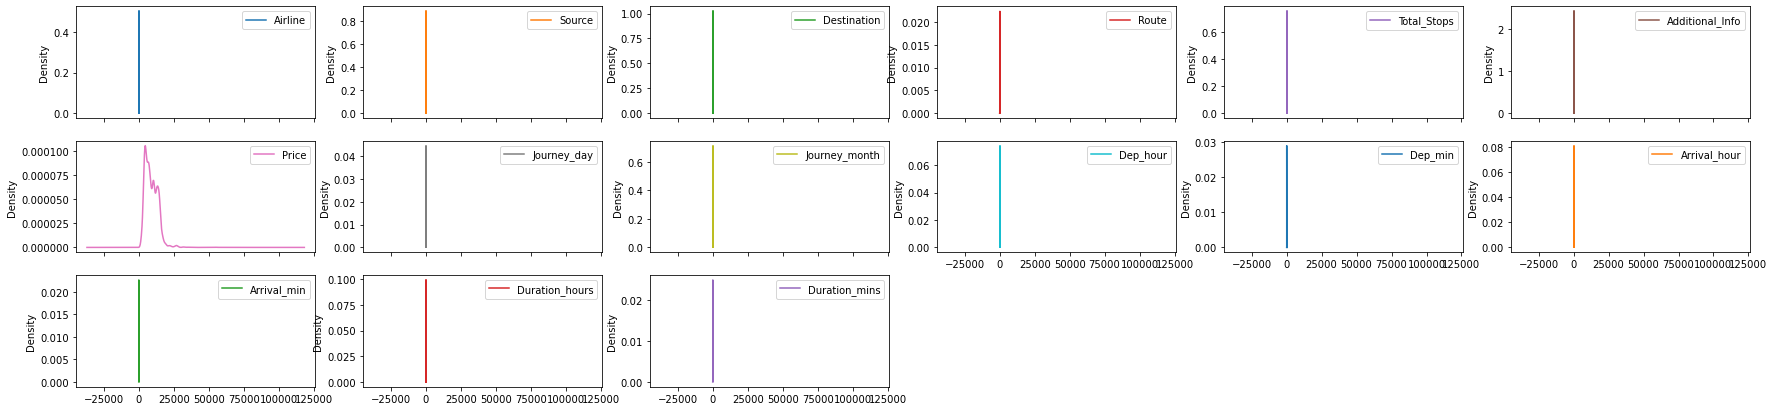

In [56]:
Train.plot(kind='kde',subplots=True,layout=(3,6),figsize=(30,7))

array([[<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>]],
      dtype=object)

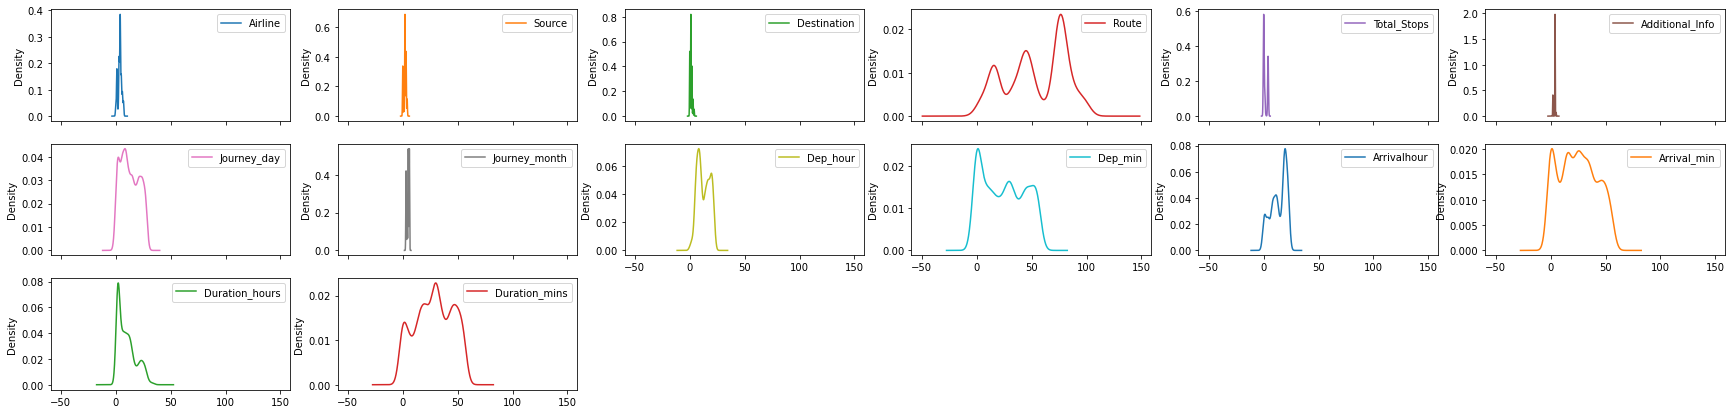

In [57]:
Test.plot(kind='kde',subplots=True,layout=(3,6),figsize=(30,7))

In [159]:
Test.skew()

Airline           -0.204261
Source            -0.425132
Destination        0.789913
Route             -0.270525
Total_Stops        0.662559
Additional_Info   -1.563650
Journey_day        0.197986
Journey_month     -0.409452
Dep_hour           0.079427
Dep_min            0.134901
Arrivalhour       -0.436214
Arrival_min        0.107708
Duration_hours     0.810549
Duration_mins     -0.107624
dtype: float64

No skewness is seen in the Test dataset as all the values are less than +/- 5 in the numerical columns.

## Scaling The Data using Standard Scaler
##### Standardizing the Train dataset

In [160]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x1=sc.fit_transform(x)
x=x1
x

array([[-0.34252519, -1.64746205,  0.80503939, ..., -0.88857454,
        -0.95822674,  1.29132965],
       [-1.45571873,  0.8818867 , -1.15190042, ..., -0.58681519,
        -0.36140337, -0.18996223],
       [ 0.21407159,  0.03877045, -0.17343052, ...,  0.01670351,
         1.07097273, -1.67125411],
       ...,
       [ 0.21407159, -1.64746205,  0.80503939, ..., -0.28505584,
        -0.83886207, -1.67125411],
       [ 2.44045869, -1.64746205,  0.80503939, ..., -0.88857454,
        -0.95822674,  0.6988129 ],
       [-1.45571873,  0.03877045, -0.17343052, ..., -0.58681519,
        -0.2420387 , -0.4862206 ]])

### For standarizing the test data:

In [161]:
TesT=sc.fit_transform(Test)
TesT

array([[ 0.23093967,  0.02883066, -0.16723386, ...,  0.02536731,
         0.00767754,  1.59134014],
       [-0.35106376,  0.87004532, -1.17216778, ..., -0.27201909,
        -0.73445359, -1.69557093],
       [ 0.23093967,  0.02883066, -0.16723386, ..., -1.4615647 ,
         1.61562833,  0.99371995],
       ...,
       [ 0.23093967,  0.02883066, -0.16723386, ...,  0.02536731,
        -0.48707655,  0.39609975],
       [-1.51507062,  0.02883066, -0.16723386, ..., -0.5694055 ,
         0.62612015, -0.79914064],
       [ 0.8129431 ,  0.02883066, -0.16723386, ..., -0.5694055 ,
         0.50243163, -0.50033054]])

## Splitting the train data for Machine Learning:

Since the target column is continuous hence we are going the way of linear Regression:

### Checking the Best Fit Model

In [162]:
ln=LinearRegression()
maxAcc = 0
maxRS = 0
for i in range(1,100):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.22,random_state=i)
    ln = LinearRegression()
    ln.fit(x_train,y_train)
    pred = ln.predict(x_test)
    acc = r2_score(y_test,pred)
    if acc>maxAcc:
        maxAcc=acc
        maxRS=i
print("Maximum r2 score is ",maxAcc,"at random state ",maxRS)

Maximum r2 score is  0.473146701598642 at random state  4


### At random state 4 ,the training accuracy and testing R2 Score is: 47.31%

In [61]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.22,random_state=4)
x_train.shape,x_test.shape, y_train.shape,y_test.shape

((8158, 14), (2302, 14), (8158,), (2302,))

Regularization methods:

In [62]:
#Lasso Regression:
l=Lasso()
l.fit(x_train,y_train)
pred_test=l.predict(x_test)
print('Error:')
print('Mean absolute error:',mean_absolute_error(y_test,pred_test))
print('Mean squared error:',mean_squared_error(y_test,pred_test))
print('Root mean squared error:',np.sqrt(mean_squared_error(y_test,pred_test)))
print('lasso R2 Score=',r2_score(y_test,pred_test)*100)

Error:
Mean absolute error: 2387.618809660067
Mean squared error: 10247753.292177811
Root mean squared error: 3201.211222674601
lasso R2 Score= 47.31230836015302


In [63]:
#Ridge Regression:
r=Ridge() 
r.fit(x_train,y_train)
pred_test=r.predict(x_test)
print('Error:')
print('Mean absolute error:',mean_absolute_error(y_test,pred_test))
print('Mean squared error:',mean_squared_error(y_test,pred_test))
print('Root mean squared error:',np.sqrt(mean_squared_error(y_test,pred_test)))
print('ridge R2 Score=',r2_score(y_test,pred_test)*100)

Error:
Mean absolute error: 2387.794976168372
Mean squared error: 10247315.358540626
Root mean squared error: 3201.142820703354
ridge R2 Score= 47.314559947576804


In [64]:
#ElasticNet Regression:
en=ElasticNet() 
en.fit(x_train,y_train)
pred_test=en.predict(x_test)
print('Error:')
print('Mean absolute error:',mean_absolute_error(y_test,pred_test))
print('Mean squared error:',mean_squared_error(y_test,pred_test))
print('Root mean squared error:',np.sqrt(mean_squared_error(y_test,pred_test)))
print('en R2 Score=',r2_score(y_test,pred_test)*100)

Error:
Mean absolute error: 2509.243189252396
Mean squared error: 11056208.67465574
Root mean squared error: 3325.087769466505
en R2 Score= 43.155724308789765


Ensemble methods:

In [65]:
#Stochastic Gradient Descent Regression:
sgd=SGDRegressor() 
sgd.fit(x_train,y_train)
pred_test=sgd.predict(x_test)
print('Error:')
print('Mean absolute error:',mean_absolute_error(y_test,pred_test))
print('Mean squared error:',mean_squared_error(y_test,pred_test))
print('Root mean squared error:',np.sqrt(mean_squared_error(y_test,pred_test)))
print('dt R2 Score=',r2_score(y_test,pred_test)*100)

Error:
Mean absolute error: 2384.7778406520797
Mean squared error: 10280771.702155458
Root mean squared error: 3206.364249762565
dt R2 Score= 47.142547852289496


In [66]:
#RandomForestRegression:
rf=RandomForestRegressor() 
rf.fit(x_train,y_train)
pred_test=rf.predict(x_test)
print('Error:')
print('Mean absolute error:',mean_absolute_error(y_test,pred_test))
print('Mean squared error:',mean_squared_error(y_test,pred_test))
print('Root mean squared error:',np.sqrt(mean_squared_error(y_test,pred_test)))
print('rf R2 Score=',r2_score(y_test,pred_test)*100)

Error:
Mean absolute error: 629.804141486699
Mean squared error: 1739621.2348789673
Root mean squared error: 1318.9470174646772
rf R2 Score= 91.0559295701044


In [67]:
#Support vector Regression:
svr=SVR()
svr.fit(x_train,y_train)
pred_test=svr.predict(x_test)
print('Error:')
print('Mean absolute error:',mean_absolute_error(y_test,pred_test))
print('Mean squared error:',mean_squared_error(y_test,pred_test))
print('Root mean squared error:',np.sqrt(mean_squared_error(y_test,pred_test)))
print('svr R2 Score=',r2_score(y_test,pred_test)*100)

Error:
Mean absolute error: 3421.136954082887
Mean squared error: 18832203.431238834
Root mean squared error: 4339.6086725923615
svr R2 Score= 3.1763061625075473


In [68]:
#KNeighborsRegression:
kn=KNeighborsRegressor()
kn.fit(x_train,y_train)
pred_test=kn.predict(x_test)
print('Error:')
print('Mean absolute error:',mean_absolute_error(y_test,pred_test))
print('Mean squared error:',mean_squared_error(y_test,pred_test))
print('Root mean squared error:',np.sqrt(mean_squared_error(y_test,pred_test)))
print('kn R2 Score=',r2_score(y_test,pred_test)*100)

Error:
Mean absolute error: 1206.9360556038228
Mean squared error: 4921944.85556907
Root mean squared error: 2218.5456622682054
kn R2 Score= 74.69436417673133


In [69]:
#GradientBoostingregression:
gb=GradientBoostingRegressor()
gb.fit(x_train,y_train)
pred_test=gb.predict(x_test)
print('Error:')
print('Mean absolute error:',mean_absolute_error(y_test,pred_test))
print('Mean squared error:',mean_squared_error(y_test,pred_test))
print('Root mean squared error:',np.sqrt(mean_squared_error(y_test,pred_test)))
print('gb R2 Score=',r2_score(y_test,pred_test)*100)

Error:
Mean absolute error: 1241.4867421867348
Mean squared error: 3295534.194764028
Root mean squared error: 1815.3606238882753
gb R2 Score= 83.05637494465887


In [70]:
#AdaBoostRegression:
ab=AdaBoostRegressor()
ab.fit(x_train,y_train)
pred_test=ab.predict(x_test)
print('Error:')
print('Mean absolute error:',mean_absolute_error(y_test,pred_test))
print('Mean squared error:',mean_squared_error(y_test,pred_test))
print('Root mean squared error:',np.sqrt(mean_squared_error(y_test,pred_test)))
print('ab R2 Score=',r2_score(y_test,pred_test)*100)

Error:
Mean absolute error: 3178.1620159829795
Mean squared error: 14347307.780844243
Root mean squared error: 3787.7840198253443
ab R2 Score= 26.23490177148359


In [71]:
#ExtraTreesRegression:
et=ExtraTreesRegressor()
et.fit(x_train,y_train)
pred_test=et.predict(x_test)
print('Error:')
print('Mean absolute error:',mean_absolute_error(y_test,pred_test))
print('Mean squared error:',mean_squared_error(y_test,pred_test))
print('Root mean squared error:',np.sqrt(mean_squared_error(y_test,pred_test)))
print('et R2 Score=',r2_score(y_test,pred_test)*100)

Error:
Mean absolute error: 608.1816065739936
Mean squared error: 1729730.1938713547
Root mean squared error: 1315.1920748968018
et R2 Score= 91.10678326493368


### Extra Trees Regressor gives the best R2 Score of 91.10%

But we will check the overfitting or underfitting with the cross validation score.

# Cross Validation Method

In [72]:
from sklearn.model_selection import cross_val_score

scr=cross_val_score(ln,x,y,cv=5)
print("Cross validadtion score of Linear regression Model is", scr.mean())

scr=cross_val_score(l,x,y,cv=5)
print("Cross validadtion score of Lasso Regression is", scr.mean())

scr=cross_val_score(r,x,y,cv=5)
print("Cross validadtion score of Ridge Regression is", scr.mean())

scr=cross_val_score(en,x,y,cv=5)
print("Cross validadtion score of Elastic Net is", scr.mean())

scr=cross_val_score(sgd,x,y,cv=5)
print("Cross validadtion score of SGDRegression is", scr.mean())

scr=cross_val_score(rf,x,y,cv=5)
print("Cross validadtion score of Random Forest is", scr.mean())

scr=cross_val_score(svr,x,y,cv=5)
print("Cross validadtion score of SVR is", scr.mean())

scr=cross_val_score(kn,x,y,cv=5)
print("Cross validadtion score of KNeighbors is", scr.mean())

scr=cross_val_score(gb,x,y,cv=5)
print("Cross validadtion score of Gradient Boosting is", scr.mean())

scr=cross_val_score(ab,x,y,cv=5)
print("Cross validadtion score of AdaBoost is", scr.mean())

scr=cross_val_score(et,x,y,cv=5)
print("Cross validadtion score of ExtraTrees is", scr.mean())

Cross validadtion score of Linear regression Model is 0.418785061749021
Cross validadtion score of Lasso Regression is 0.4188014291373629
Cross validadtion score of Ridge Regression is 0.418785424129452
Cross validadtion score of Elastic Net is 0.38576084493531965
Cross validadtion score of SGDRegression is 0.41804817891131674
Cross validadtion score of Random Forest is 0.8868534462783437
Cross validadtion score of SVR is 0.028460521073481092
Cross validadtion score of KNeighbors is 0.7539917714859413
Cross validadtion score of Gradient Boosting is 0.8079203604905686
Cross validadtion score of AdaBoost is 0.4484529093987211
Cross validadtion score of ExtraTrees is 0.8999264239853428


### The CV score for Extra Trees Regression model is 89.99== 90% which is similar to the R2 Score of 91.10==91%.
- This score we selected after using the absolute value of R2-CV score between both Extra Trees and Random Forest Regressor.
- From this, we can say that the Extra Trees Regression Algorithm works best for the given model.

<function matplotlib.pyplot.show(close=None, block=None)>

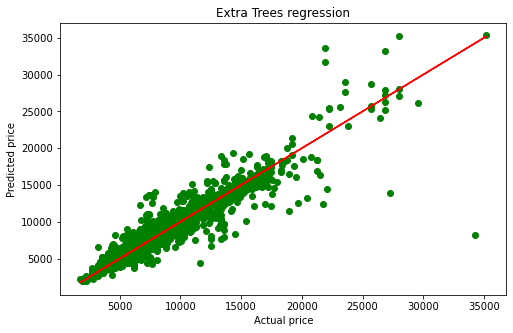

In [97]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,5))
plt.scatter(x=y_test,y=pred_test,color='g')
plt.plot(y_test,y_test,color='r')
plt.xlabel("Actual price",fontsize=10)
plt.ylabel("Predicted price",fontsize=10)
plt.title("Random Forest Regression")
plt.show

#### The best fit line is covering all of the point == model is trained and is a good fit.

## Hyper parameter tuning of best model above (Extra Trees Regressor)

In [168]:
from sklearn.model_selection import GridSearchCV

#creating parameters to pass in Grid serach
para={'criterion': ['squared_error', 'friedman_mse'],'max_features': ['auto','sqrt','log2'],
      'max_depth': [8,9,10,11], 'min_samples_leaf':[1,2,3,4]}

In [169]:
GCV=GridSearchCV(ExtraTreesRegressor(),para,cv=5)
GCV.fit(x_train,y_train) 
GCV.best_params_  

{'criterion': 'friedman_mse',
 'max_depth': 11,
 'max_features': 'auto',
 'min_samples_leaf': 2}

In [175]:
#Final Model:
Et=ExtraTreesRegressor(criterion= 'friedman_mse',max_depth=11,max_features='auto',min_samples_leaf= 2)
Et.fit(x_train,y_train)
predfm=Et.predict(x_test)
print('R2_score:',r2_score(y_test,predfm)*100)
print("Best R2 Score for GCV best estimator", et, "is",r2_score(y_test,predfm)*100)
print('Error:')
print('Mean absolute error:',mean_absolute_error(y_test,predfm))
print('Mean squared error:',mean_squared_error(y_test,predfm))
print('Root mean squared error:',np.sqrt(mean_squared_error(y_test,predfm)))

R2_score: 87.34716619157217
Best R2 Score for GCV best estimator ExtraTreesRegressor(max_depth=4, max_features='auto') is 87.34716619157217
Error:
Mean absolute error: 870.0185738908945
Mean squared error: 2465359.6308275633
Root mean squared error: 1570.146372421235


## Saving the model

We are using the obj. method to save the model.

In [172]:
#saving the model 
import joblib
joblib.dump(Et,'FlightPred.obj')

['FlightPred.obj']

In [173]:
FM=joblib.load('FlightPred.obj')

### Conclusion:

- Best R2 Score for GCV best estimator ExtraTreesRegressor(max_depth=4, max_features='auto') is 87.34, which means the model works 87% for predicting the fares of flights.

Error:
- Mean absolute error: 870.0185738908945
- Mean squared error: 2465359.6308275633
- Root mean squared error: 1570.146372421235

- The predicted price is displayed below:

In [174]:
Final=pd.DataFrame({'Actual':y_test,'Predicted':predfm})
Final

,Actual,Predicted
4085,12242,12556.891768
7159,12384,10556.018008
6976,6300,6593.317826
2445,8476,10914.188353
6161,6111,5890.092377
...,...,...
5192,14151,13169.896329
3488,10844,10411.609396
8160,6152,8024.998993
6882,7725,9301.328903


In [178]:
#loading the saved object file:

Price=joblib.load('FlightPred.obj')

In [181]:
Flight_price=Price.predict(TesT)
Flight_price     #FINAL RESULT

array([13702.76431387,  5156.89329167, 11811.14991723, ...,
       15832.47279467, 13033.6865267 ,  9639.61144445])

In [184]:
#Making a dataframe of these final prices which we got from test dataset:
FPrice=pd.DataFrame({"Price":Flight_price})
FPrice

,Price
0,13702.764314
1,5156.893292
2,11811.149917
3,10513.206165
4,3928.068599
...,...
2621,9264.352123
2622,4392.512218
2623,15832.472795
2624,13033.686527


- With these predictions we can know the fare of the flights efficiently.

# Thank you.